# Die Stromerzeugung in Deutschland 2018 - 2023

**Institution:** Ostbayrische Technische Hochschule Amberg-Weiden

**Professor:** Prof. Dr. Christian Bergler

**Modul:** Data Engineering & Data Analytics

**Autoren:** Dominik Schwagerl, Nils Baierl

**Studiengang:** Künstliche Intelligenz 

**Bearbeitungszeitraum:** 18.12.2023 - 28.01.2024

**Abstract:**
*In dieser Projektarbeit soll die Stromerzeugung der vergangenen Jahre in Deutschland anhand historischer Daten analysiert werden. Betrachtungszeitraum sind die Jahre 2018-2023. Ziel ist es insbesondere, Erkenntnisse zum Strom-Mix in Deutschland zu gewinnen und den Ausbau der erneuerbaren Energien zu untersuchen, wobei der Schwerpunkt auf dem Ausbau der Photovoltaik-Stromerzeugung liegt.*

## Inhaltsverzeichnis <a name="inhaltsverzeichnis"></a>

1. [Datenvorbereitung](#1)
    - a) [Einlesen der CSV-Dateien](#1a)
    - b) [Anpassung der Datentypen](#1b)
    - c) [Überprüfung auf fehlende Werte](#1c)
    - d) [Beurteilung der Datenqulität](#1d)
2. [Explorative Datenanalyse](#2)
    - a) [Wann wurde am meisten Strom erzeugt?](#2a)
    - b) [Wann wurde am meisten Windstrom erzeugt?](#2b)
    - c) [Absolute Stromerzeugung pro Energieträger](#2c)
    - d) [An wie vielen Tagen wurde mehr als 30% des Stroms durch Sonnenenergie erzeugt?](#2d)
    - e) [Visualisierung und Vergleich des täglich erzeugten Windstroms](#2e)
    - f) [Box-Whisker-Plots: Solarstrom pro Jahr](#2f)
3. [Weiterführende Analyse der Stromerzeugung](#3)
    - a) [Visualisierung der Stromerzeugung pro Monat](#3a)
    - b) [Mittlere Energieerzeugung pro Wochentag](#3b)
    - c) [Zusammensetzung des Strommixes im Zeitverlauf](#3c)
    - d) [Anteil der Kernenergie im Zeitverlauf](#3d)
    - e) [Zeitlicher Verlauf der Energieerzeugung](#3e)
    - f) [Entwicklung der Stromerzeuger seit 2018](#3f)
4. [Erzeugter Solarstrom in Abhängigkeit vom Wetter](#4)
    - a) [Beschaffung historischer Wetterdaten für Amberg](#4a)
    - b) [Untersuchung des Wetters auf Korrelation](#4b)
    - c) [Sonnenscheinstunden und jährliche Sonneneinstrahlung](#4c)
    - d) [aggregierte Sonneneinstrahlung pro Monat](#4d)
    - e) [Weitere Diagramme](#4e)
    - f) [Untersuchung der Wettervariablen](#4f)
    - g) [Zusammenhang zwischen Wetterdaten und Solarstromerzeugung](#4g)
5. [Photovoltaik-Ausbau in Deutschland](#5)
    - a) [Einlesen des Marktstammdatenregisters](#5a)
    - b) [Anpassung und Beurteilung der Daten](#5b)
    - c) [Anzahl der Photovoltaikanlagen](#5c)
    - d) [Bruttoleistungen in genauerer Betrachtung](#5d)
    - e) [Die höchsten Bruttoleistungen](#5e)
    - f) [Monatlicher Zubau der Bruttoleistungen](#5f)
    - g) [Installierte Bruttoleistungen im Zeitverlauf seit 2000](#5g)
    - h) [Installierte Bruttoleistungen pro Bundesland](#5h)
    - i) [Typische Namen für PV-Anlagen](#5i)
    - j) [Zusammenhang zwischen installierter Leistung und erzeugtem Solarstrom](#5j)
6. [Modellbildung](#6)
    - a) [Modelltraining](#6a)
    - b) [Vorhersagen](#6b)
    - c) [Mögliche Verbesserungen am Modell](#6c)

## 1 Datenvorbereitung <a name=1></a>

#### a) Einlesen der CSV-Dateien zur Nettostromversorgung <a name="1a"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns


pio.renderers.default = "notebook"
pio.renderers.default = 'iframe'

pd.options.mode.chained_assignment = None

files = [
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2018.csv",
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2019.csv",
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2020.csv",
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2021.csv",
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2022.csv",
    "Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_2023.csv"
]

#concatenating the data
dataframes = [pd.read_csv(file) for file in files]
df_el = pd.concat(dataframes, ignore_index=True)
df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0     01.01.2018             156.8            46.70         126.60   
1     02.01.2018             220.9            47.10         128.30   
2     03.01.2018             196.0            48.80         127.70   
3     04.01.2018             216.8            51.80         128.40   
4     05.01.2018             209.6            52.00         128.70   
...          ...               ...              ...            ...   
2186  27.12.2023               0.0            58.08         120.08   
2187  28.12.2023               0.0            56.76         121.76   
2188  29.12.2023               0.0            54.64         122.82   
2189  30.12.2023               0.0            53.26         123.31   
2190  31.12.2023               0.0            53.86         124.90   

      Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0              204.50            8.9            43.60     2.30        66.30   
1              355.10           10.4           107.60     2.40       117.90   
2              248.00            8.3            65.30     2.30        92.10   
3              319.90            9.1           176.60     2.30       113.20   
4              338.50            9.0           192.90     2.30       123.40   
...               ...            ...              ...      ...          ...   
2186           109.89            NaN            43.47     9.61       125.11   
2187            77.25            NaN            59.71    10.48        77.81   
2188            74.39            NaN            60.77     9.31        71.84   
2189            78.90            NaN            53.99     9.37        79.68   
2190            78.01            NaN            48.26     9.43        70.11   

      Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0                0.40                 1.10         1.20   
1                0.40                 1.20         1.60   
2                0.40                 1.50         1.40   
3                0.40                 1.70         1.50   
4                0.40                 1.50         1.40   
...               ...                  ...          ...   
2186             0.49                 2.76         6.78   
2187             0.49                 1.54         4.90   
2188             0.49                 2.32         4.90   
2189             0.49                 2.52         5.78   
2190             0.49                 3.02         5.07   

      Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
0                      13.10                         15.10   
1                      13.30                         15.20   
2                      14.30                         16.40   
3                      13.90                         15.90   
4                      12.80                         14.70   
...                      ...                           ...   
2186                   13.40                         15.12   
2187                   13.28                         14.99   
2188                   12.84                         14.49   
2189                   12.78                         14.42   
2190                   12.76                         14.40   

      Wind Offshore(GWh)  Wind Onshore(GWh)  Solar(GWh)  
0                  76.40             609.60       31.10  
1                  63.90             393.20       17.20  
2                  92.30             820.20       13.80  
3                  37.60             551.90        9.80  
4                  28.00             512.30       19.40  
...                  ...                ...         ...  
2186               97.21             391.67       51.65  
2187              125.05             866.36       32.45  
2188              130.80             910.13       30.52  
2189              135.20             613.28       47.41  
2190              136.91             614.10       26.35  

[2191 rows x 17 columns]

#### b) Anpassung der Datentypen <a name="1b"></a>

In [2]:
# Untersuchung der Datentypen
df_el.dtypes

Tag                              object
Kernenergie(GWh)                float64
Laufwasser(GWh)                 float64
Biomasse(GWh)                   float64
Braunkohle(GWh)                 float64
Kohlegas(GWh)                   float64
Steinkohle(GWh)                 float64
Öl(GWh)                         float64
Erdgas(GWh)                     float64
Geothermie(GWh)                 float64
Speicherwasser(GWh)             float64
Andere(GWh)                     float64
Erneuerbarer Müll(GWh)          float64
Nicht-erneuerbarer Müll(GWh)    float64
Wind Offshore(GWh)              float64
Wind Onshore(GWh)               float64
Solar(GWh)                      float64
dtype: object

Wenn man sich die Datentypen der einzelnen Spalten anschaut, so fällt einem auf, dass der Tag **nicht** im Datetime-Format gespeichert wird. Die restlichen Spalten sind alles Energiewerte als **float**.
Folglich muss nur die Spalte **Tag** konvertiert werden, um besser damit arbeiten zu können.

In [3]:
# Konvertiere den Datentypen der Spalte Tag zum Datetime-Format
df_el["Tag"] = pd.to_datetime(df_el["Tag"], format="%d.%m.%Y")

df_el.dtypes

Tag                             datetime64[ns]
Kernenergie(GWh)                       float64
Laufwasser(GWh)                        float64
Biomasse(GWh)                          float64
Braunkohle(GWh)                        float64
Kohlegas(GWh)                          float64
Steinkohle(GWh)                        float64
Öl(GWh)                                float64
Erdgas(GWh)                            float64
Geothermie(GWh)                        float64
Speicherwasser(GWh)                    float64
Andere(GWh)                            float64
Erneuerbarer Müll(GWh)                 float64
Nicht-erneuerbarer Müll(GWh)           float64
Wind Offshore(GWh)                     float64
Wind Onshore(GWh)                      float64
Solar(GWh)                             float64
dtype: object

#### c) Überprüfung auf fehlende Werte <a name="1c"></a>

Bei der Ausgabe des DataFrame aus Aufgabe 1a ist zu erkennen, dass in der Spalte **Kohlegas** gegen Ende des zu analysierenden Zeitraums sehr viele **NaN-Werte** eingetragen sind. Nun gilt es zu untersuchen, wie viele **NaN-Werte** eingetragen sind und was deren mögliche Bedeutung sein könnte.

In [4]:
# Anzahl der Null-Einträge
df_el.isnull().sum()

Tag                                0
Kernenergie(GWh)                   0
Laufwasser(GWh)                    0
Biomasse(GWh)                      0
Braunkohle(GWh)                    0
Kohlegas(GWh)                   1461
Steinkohle(GWh)                    0
Öl(GWh)                            0
Erdgas(GWh)                        0
Geothermie(GWh)                    0
Speicherwasser(GWh)                0
Andere(GWh)                        0
Erneuerbarer Müll(GWh)             0
Nicht-erneuerbarer Müll(GWh)       0
Wind Offshore(GWh)                 0
Wind Onshore(GWh)                  0
Solar(GWh)                         0
dtype: int64

In [5]:
# Filtere nach not null
filter = df_el["Kohlegas(GWh)"].notnull()
df_not_null = df_el[filter]
df_not_null

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0   2018-01-01             156.8             46.7          126.6   
1   2018-01-02             220.9             47.1          128.3   
2   2018-01-03             196.0             48.8          127.7   
3   2018-01-04             216.8             51.8          128.4   
4   2018-01-05             209.6             52.0          128.7   
..         ...               ...              ...            ...   
725 2019-12-27             218.1             47.9          130.7   
726 2019-12-28             218.2             47.5          130.2   
727 2019-12-29             216.6             44.8          130.6   
728 2019-12-30             206.1             42.5          127.7   
729 2019-12-31             200.1             40.3          129.8   

     Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0              204.5            8.9             43.6      2.3         66.3   
1              355.1           10.4            107.6      2.4        117.9   
2              248.0            8.3             65.3      2.3         92.1   
3              319.9            9.1            176.6      2.3        113.2   
4              338.5            9.0            192.9      2.3        123.4   
..               ...            ...              ...      ...          ...   
725            220.8            0.0             94.3      2.0        150.3   
726            208.5            0.0             88.2      1.9        163.6   
727            179.5            0.0             60.6      1.9        123.5   
728            163.2            0.0             70.5      1.9        119.5   
729            183.6            0.0             77.4      1.9        122.8   

     Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0                0.4                  1.1          1.2   
1                0.4                  1.2          1.6   
2                0.4                  1.5          1.4   
3                0.4                  1.7          1.5   
4                0.4                  1.5          1.4   
..               ...                  ...          ...   
725              0.5                  1.9          0.8   
726              0.6                  1.4          0.8   
727              0.5                  1.3          0.7   
728              0.5                  1.6          0.7   
729              0.5                  2.2          0.7   

     Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  \
0                      13.1                          15.1                76.4   
1                      13.3                          15.2                63.9   
2                      14.3                          16.4                92.3   
3                      13.9                          15.9                37.6   
4                      12.8                          14.7                28.0   
..                      ...                           ...                 ...   
725                    16.0                          18.7                39.4   
726                    15.4                          18.0                64.3   
727                    15.4                          17.9               120.8   
728                    15.3                          17.9               134.5   
729                    14.9                          17.4                86.0   

     Wind Onshore(GWh)  Solar(GWh)  
0                609.6        31.1  
1                393.2        17.2  
2                820.2        13.8  
3                551.9         9.8  
4                512.3        19.4  
..                 ...         ...  
725              106.7        22.2  
726               88.0        38.4  
727              218.3        58.1  
728              527.5        56.4  
729              360.5        38.7  

[730 rows x 17 columns]

Es sind genau **730 Zeilen ohne Nan-Werte**, was insgesamt betrachtet viel zu viele Daten sind, um sie zu entfernen. Das Löschen der Zeilen mit NaN-Einträgen stellt also keine Möglichkeit dar. 
Was allerdings noch auffällt, ist, dass die letzten Einträge des nach **Not-Null**-gefilterten Dataframe in der Spalte Kohlegas den Wert 0.0 besitzen.

In [6]:
# Filtere nach allen Kohlegaswerten die gleich 0 sind
filter = df_not_null["Kohlegas(GWh)"] == 0.0
df_not_null[filter]

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
583 2019-08-07             180.3             58.6          107.6   
584 2019-08-08             176.8             60.5          107.8   
585 2019-08-09             162.0             59.8          106.7   
586 2019-08-10             138.1             58.3          104.3   
587 2019-08-11             138.1             55.3          106.1   
..         ...               ...              ...            ...   
725 2019-12-27             218.1             47.9          130.7   
726 2019-12-28             218.2             47.5          130.2   
727 2019-12-29             216.6             44.8          130.6   
728 2019-12-30             206.1             42.5          127.7   
729 2019-12-31             200.1             40.3          129.8   

     Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
583            309.2            0.0            114.4      2.0        168.5   
584            232.9            0.0             59.0      2.0        132.4   
585            268.4            0.0             92.2      2.0        167.4   
586            121.2            0.0             40.1      2.0         53.0   
587            131.1            0.0             41.4      2.0         58.0   
..               ...            ...              ...      ...          ...   
725            220.8            0.0             94.3      2.0        150.3   
726            208.5            0.0             88.2      1.9        163.6   
727            179.5            0.0             60.6      1.9        123.5   
728            163.2            0.0             70.5      1.9        119.5   
729            183.6            0.0             77.4      1.9        122.8   

     Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
583              0.3                  5.4          1.1   
584              0.3                  4.8          1.0   
585              0.3                  5.3          1.1   
586              0.3                  6.3          1.0   
587              0.3                  4.8          1.0   
..               ...                  ...          ...   
725              0.5                  1.9          0.8   
726              0.6                  1.4          0.8   
727              0.5                  1.3          0.7   
728              0.5                  1.6          0.7   
729              0.5                  2.2          0.7   

     Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  \
583                    12.6                          14.6                49.6   
584                     4.6                           5.4                76.0   
585                    15.1                          17.7                57.4   
586                    13.5                          15.7               107.6   
587                    15.4                          18.0               124.5   
..                      ...                           ...                 ...   
725                    16.0                          18.7                39.4   
726                    15.4                          18.0                64.3   
727                    15.4                          17.9               120.8   
728                    15.3                          17.9               134.5   
729                    14.9                          17.4                86.0   

     Wind Onshore(GWh)  Solar(GWh)  
583              144.2       113.5  
584              260.4       209.1  
585              125.9       180.1  
586              492.7       137.8  
587              276.9       216.2  
..                 ...         ...  
725              106.7        22.2  
726               88.0        38.4  
727              218.3        58.1  
728              527.5        56.4  
729              360.5        38.7  

[147 rows x 17 columns]

Folglich kann man sagen, dass die ersten Einträge der Spalte Kohlegas(GWh) bis Index 583 einen Informationsgehalt besitzen. Anschließend folgen 147 Werte, welche gleich 0.0 sind, und darauf nur noch NaN-Werte. 

**Vermutung:** Der Ausstieg der Energieerzeugung durch Kohlegas ist im August 2019 begonnen worden und zu Beginn des Jahres 2020 komplett gelungen. 

Vergleicht man die Kategorie der Energieerzeugung durch Kernergie mit der Kohlegaserzeugung, so ist zu erkennen, dass hier auch nach der **Abschlatung der Atomkraftwerke**, welche spätestens bis zum 15. April 2023 vollzogen wurde (vgl. [Bundesamt für Sicherheit der nuklearen Entsorgung](https://www.base.bund.de/DE/themen/kt/ausstieg-atomkraft/ausstieg_node.html)), weiterhin gültige Werte (=0.0) getrackt werden. Somit könnte man auf die Idee kommen, dass die NaN-Werte der Kategorie Kohlegas durch die Abschaffung dieser Energiekraftwerke entstanden sind. 

**Strategie:** Alle NaN-Werte (diese existieren nur in der Spalte Kohlegas(GWh)) werden durch 0.0 ersetzt.

In [7]:
# Ersetzen der Null-Werte
df_el = df_el.fillna(0.0)

df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0    2018-01-01             156.8            46.70         126.60   
1    2018-01-02             220.9            47.10         128.30   
2    2018-01-03             196.0            48.80         127.70   
3    2018-01-04             216.8            51.80         128.40   
4    2018-01-05             209.6            52.00         128.70   
...         ...               ...              ...            ...   
2186 2023-12-27               0.0            58.08         120.08   
2187 2023-12-28               0.0            56.76         121.76   
2188 2023-12-29               0.0            54.64         122.82   
2189 2023-12-30               0.0            53.26         123.31   
2190 2023-12-31               0.0            53.86         124.90   

      Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0              204.50            8.9            43.60     2.30        66.30   
1              355.10           10.4           107.60     2.40       117.90   
2              248.00            8.3            65.30     2.30        92.10   
3              319.90            9.1           176.60     2.30       113.20   
4              338.50            9.0           192.90     2.30       123.40   
...               ...            ...              ...      ...          ...   
2186           109.89            0.0            43.47     9.61       125.11   
2187            77.25            0.0            59.71    10.48        77.81   
2188            74.39            0.0            60.77     9.31        71.84   
2189            78.90            0.0            53.99     9.37        79.68   
2190            78.01            0.0            48.26     9.43        70.11   

      Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0                0.40                 1.10         1.20   
1                0.40                 1.20         1.60   
2                0.40                 1.50         1.40   
3                0.40                 1.70         1.50   
4                0.40                 1.50         1.40   
...               ...                  ...          ...   
2186             0.49                 2.76         6.78   
2187             0.49                 1.54         4.90   
2188             0.49                 2.32         4.90   
2189             0.49                 2.52         5.78   
2190             0.49                 3.02         5.07   

      Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
0                      13.10                         15.10   
1                      13.30                         15.20   
2                      14.30                         16.40   
3                      13.90                         15.90   
4                      12.80                         14.70   
...                      ...                           ...   
2186                   13.40                         15.12   
2187                   13.28                         14.99   
2188                   12.84                         14.49   
2189                   12.78                         14.42   
2190                   12.76                         14.40   

      Wind Offshore(GWh)  Wind Onshore(GWh)  Solar(GWh)  
0                  76.40             609.60       31.10  
1                  63.90             393.20       17.20  
2                  92.30             820.20       13.80  
3                  37.60             551.90        9.80  
4                  28.00             512.30       19.40  
...                  ...                ...         ...  
2186               97.21             391.67       51.65  
2187              125.05             866.36       32.45  
2188              130.80             910.13       30.52  
2189              135.20             613.28       47.41  
2190              136.91             614.10       26.35  

[2191 rows x 17 columns]

#### d) Beurteilung der Datenqualität <a name="1d"></a>

Mit unseren gewählten Anpassungen ist an dem Datensatz nichts weiter auszusetzen. Die Datenintegrität und Konsistenz und die Datenvalidität ist gegeben. Die Datenaquisition und Erfassung erfolgt fast lückenlos und konnte korrigiert werden. Insgesamt sind die Daten nun vollständig.

## 2 Explorative Datenanalyse <a name="2"></a>

#### a) Wann wurde am meisten Strom erzeugt? <a name="2a"></a>

In [8]:
# Die 10 meisten Tage mit der höchsten Gesamtstromerzeugung
gesamt_pro_tag = df_el.drop("Tag", axis=1).sum(axis=1).sort_values(ascending=False).head(10)

# Übersetze den Index in ein Datum
gesamt_pro_tag = df_el.loc[gesamt_pro_tag.index]["Tag"]

# Passe Index an
gesamt_pro_tag.index = [i for i in range(1, 11)]

pd.DataFrame(gesamt_pro_tag)

Tag
1  2018-03-01
2  2018-02-28
3  2019-01-15
4  2018-02-23
5  2019-01-17
6  2018-03-02
7  2018-02-26
8  2019-01-08
9  2018-02-27
10 2019-01-30

**Antwort**: Am 01.03.2018 ist am meisten Strom erzeugt worden. 

#### b) Wann wurde am meisten Windstrom erzeugt? <a name="2b"></a>

In [9]:
# Gesamtstromerzeugung durch Wind im
windstrom_pro_tag = df_el[["Wind Offshore(GWh)","Wind Onshore(GWh)"]].sum(axis=1)

# Finde den Tag mit der höchsten Windstromerzeugung
windstrom_pro_tag_max = windstrom_pro_tag.sort_values(ascending=False).head(1)

df_el.loc[windstrom_pro_tag_max.index]["Tag"]

2180   2023-12-21
Name: Tag, dtype: datetime64[ns]

**Antwort:**
Am 21.12.2023 wurde im zu analysierenden Zeitraum am meisten Windstrom erzeugt.

#### c) Absolute Stromerzeugung pro Energieträger <a name="2c"></a>

In [10]:
abs_el = pd.DataFrame(df_el.drop("Tag", axis=1).sum())
abs_el

0
Kernenergie(GWh)              308712.72
Laufwasser(GWh)               107124.37
Biomasse(GWh)                 263523.46
Braunkohle(GWh)               598358.85
Kohlegas(GWh)                   5539.70
Steinkohle(GWh)               295524.68
Öl(GWh)                         7026.43
Erdgas(GWh)                   291738.92
Geothermie(GWh)                  955.10
Speicherwasser(GWh)             6719.62
Andere(GWh)                     4153.56
Erneuerbarer Müll(GWh)         27665.33
Nicht-erneuerbarer Müll(GWh)   31711.56
Wind Offshore(GWh)            142745.53
Wind Onshore(GWh)             591721.65
Solar(GWh)                    295966.22

<Axes: xlabel='Energieträger', ylabel='Energie in GWh'>

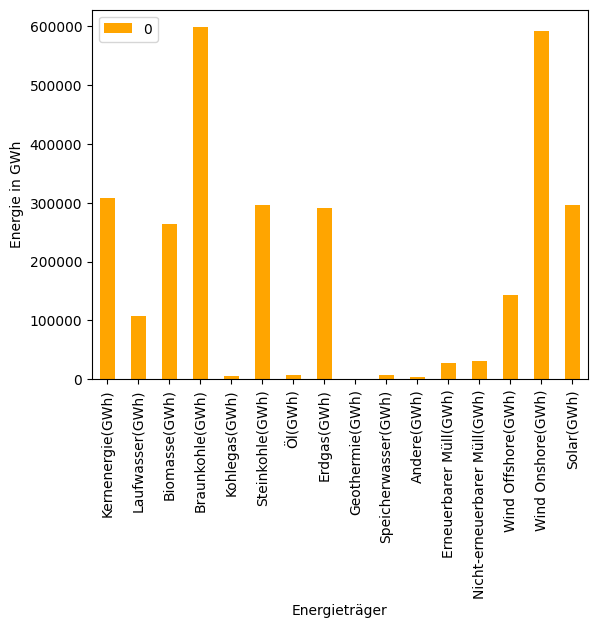

In [11]:
abs_el.plot(kind="bar", xlabel="Energieträger", ylabel="Energie in GWh", color="orange")

Die Energiegewinnung durch Braunkohle und Wind ist deutlich höher als durch andere Energieträger. Bemerkenswert sind hohe Werte der erneuerbaren Energie wie Solar, Wind Onshore und Biomasse, welche einen signifikanten Anteil der Gesamtenergie ausmachen.  Diese Vielfalt spiegelt auch die Bemühungen wider, eine nachhaltige Energiezukunft zu gestalten und die Abhängigkeit von fossilen Brennstoffen zu verringern.

#### d) An wie vielen Tagen wurde mehr als 30% des Stroms durch Sonnenenergie erzeugt? <a name="2d"></a>

In [12]:
# Berechne den Anteil der Solarenergie von der an dem Tag ingesamt Erzeugten Energie
df_solar_percentage = df_el["Solar(GWh)"]/(df_el.drop("Tag", axis=1).sum(axis=1))

# Finde alle passenden Tage
filter = df_solar_percentage > 0.3
df_solar_percentage = df_solar_percentage[filter]

# Anzahl der Tage mit mehr 
df_solar_percentage.shape[0]

32

An insgesamt 32 Tagen wurde mehr als 30% des insgesamt an diesem Tag erzeugten Strom durch Sonnenenergie erzeugt.

#### e) Visualisierung und Vergleich des täglich erzeugten Windstroms <a name="2e"></a>

In [13]:
import plotly
plotly.io.renderers.default = 'iframe'
pio.renderers.default = "notebook"


In [14]:
fig_onshore = px.histogram(df_el, x="Wind Onshore(GWh)", nbins=60, title="Histogramm der täglichen Onshore-Windstromerzeugung")
fig_onshore.update_layout(xaxis_title="Onshore-Windstromerzeugung (GWh)", yaxis_title="Häufigkeit")
fig_onshore.update_traces(marker_line_width=1.0, marker_color="orange")
fig_onshore.show()

In [15]:
fig_offshore = px.histogram(df_el, x="Wind Offshore(GWh)", nbins=60, title="Histogramm der täglichen Offshore-Windstromerzeugung")
fig_offshore.update_layout(xaxis_title='Offshore-Windstromerzeugung (GWh)', yaxis_title='Häufigkeit',  # Adding gaps between bars
                                    plot_bgcolor='rgb(230, 230, 230)')  # Setting plot background color
fig_offshore.update_traces(marker_line_width=1.0, marker_color="orange")  # Adding lines between bars

Die Onshore-Windstromerzeugung ist deutlich höher als die Offshore-Windstromerzeugung. Die meisten Windstromerzeuger befinden sich somit auf dem Land. 
Außerdem ist zu erkennen, dass die Onshore-Windstromerzeugung deutlich schneller abflacht, als die Offshore-Windstromerzeugung. Also ist die Offshore-Stromerzeugung weniger Abhängig von den Wetterverhältnissen als die Onshore-Stromerzeugung, da die Offshore-Werte weniger variieren. Insgesamt hat jedoch die Onshore-Stromerzeugung einen deutlich größeren Anteil an der insgesamt erzeugten Energie als die Offshore-Stromerzeugung.

#### f) Box-Whisker-Plots: Solarstrom pro Jahr <a name="2f"></a>

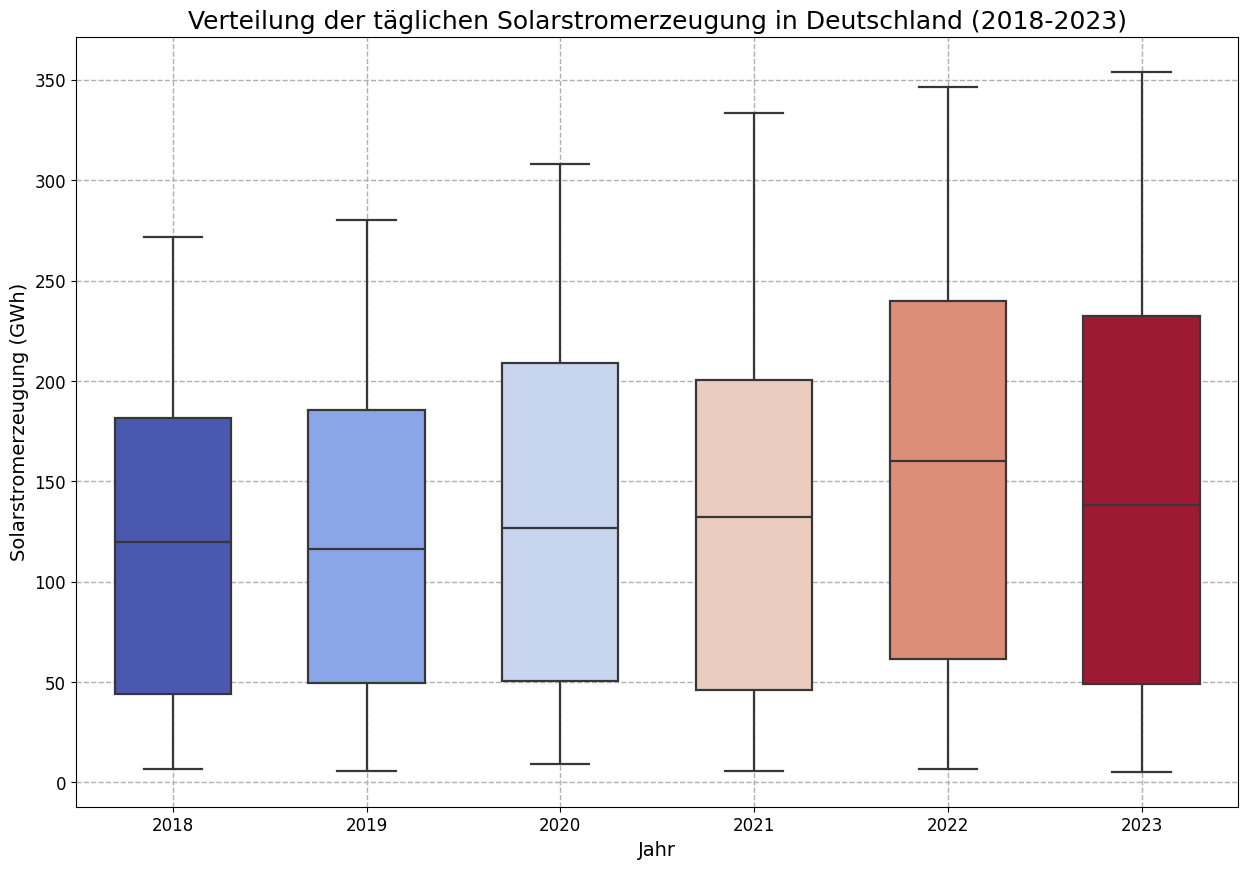

In [16]:
df_whisker = df_el
# Füge Spalte Jahr hinzu
df_whisker["Jahr"] = df_whisker["Tag"].dt.year

plt.figure(figsize=(15, 10))
sns.boxplot(x='Jahr', y='Solar(GWh)', hue='Jahr', data=df_whisker, palette="coolwarm", width=0.6, linewidth=1.6, fliersize=5, legend=False)

plt.title('Verteilung der täglichen Solarstromerzeugung in Deutschland (2018-2023)', fontsize=18)
plt.xlabel('Jahr', fontsize=14)
plt.ylabel('Solarstromerzeugung (GWh)', fontsize=14)

plt.grid(True, linestyle='--', linewidth=1, alpha=1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Im Zeitraum von 2018 bis 2023 ist ein streng monotoner Anstieg der maximal erzeugten Solarenergie zu erkennen, welcher durch verschiedene Faktoren wie technologische Fortschritte, politische Unterstützung für erneuerbare Energien und sinkende Kosten für Solarmodule vorangetrieben wurde. Dieser Trend verdeutlichte das zunehmende Vertrauen der Industrie, der Investoren und der Verbraucher in die Solarenergie als eine zuverlässige und skalierbare Quelle sauberer Energie.

Vergleicht man den Graphen mit den Ergebnissen aus Aufgabe 5c, so ist zu erkennen, dass 2022 mit den meisten Sonnenscheinstunden der Jahre 2018-2023 auch im Durchschnitt den meisten Solarstrom erzeugt hat. 

In [17]:
statistische_kenngrößen = df_whisker.describe()

print(statistische_kenngrößen["Solar(GWh)"])

count    2191.000000
mean      135.082711
min         5.340000
25%        49.550000
50%       131.400000
75%       209.250000
max       353.990000
std        88.293548
Name: Solar(GWh), dtype: float64


## 3 Weiterführende Analyse der Stromerzeugung <a name="3"></a>

#### a) Visualisierung der Stromerzeugung pro Monat <a name="3a"></a>

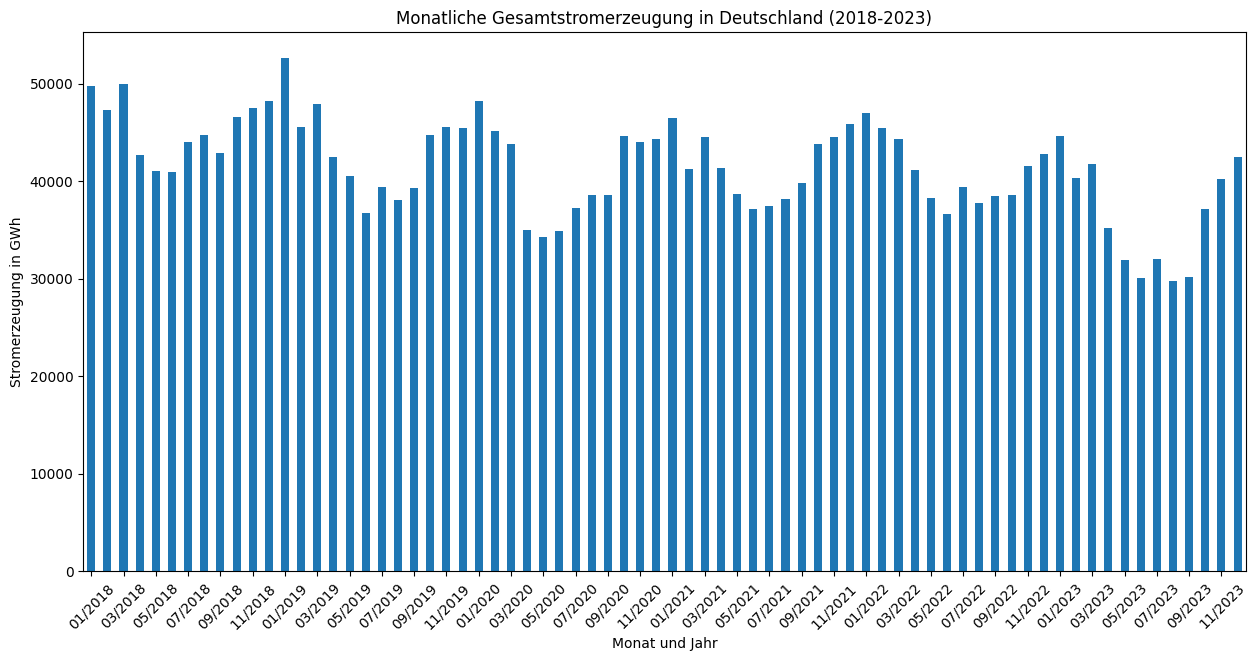

In [18]:
data_frames = []
for year in range(2018, 2024):
    files2 = f'Daten/Nettostromerzeugung/Nettostromerzeugung_in_Deutschland_{year}.csv'
    data = pd.read_csv(files2)
    data["Tag"] = pd.to_datetime(data["Tag"], format="%d.%m.%Y")
    data["Total_Production(GWh)"] = data.drop('Tag', axis=1).sum(axis=1)
    data_frames.append(data[["Tag", "Total_Production(GWh)"]])

combined_data = pd.concat(data_frames)
combined_data = combined_data.set_index("Tag")

# Agreggiere Daten für jeden Monat
monthly_data = combined_data.resample("M").sum()

# Setze x-Werte auf Jahr-Monat
monthly_data.index = monthly_data.index.to_period("M")

plt.figure(figsize=(15, 7))
monthly_data["Total_Production(GWh)"].plot(kind="bar")
plt.title("Monatliche Gesamtstromerzeugung in Deutschland (2018-2023)")
plt.xlabel("Monat und Jahr")
plt.ylabel("Stromerzeugung in GWh")

# Zeige nur noch jeden zweiten Monat auf der x-Achse (Visualisierung trotzdem vollständig)
x_labels = monthly_data.index[::2].strftime("%m/%Y")
plt.xticks(ticks=range(0, len(monthly_data), 2), labels=x_labels, rotation=45)

plt.show()

Der Verlauf zeigt Schwankungen in der Stromerzeugung über die verschiedenen Monate hinweg. Die Stromerzeugung weist saisonale Muster auf, die sich jedes Jahr wiederholen. Die Maximalwerte scheinen in den Wintermonaten (Dezember, Januar und Februar) aufzutreten, während die niedrigsten Werte in den Übergangsmonaten Frühling und Herbst zu finden sind. Im Allgemeinen zeigt die monatliche Gesamtstromerzeugung eine eher absteigende Tendenz. Die genauen Gründe für das Abflachen können vielfältig sein. So könnte zum Beispiel das Abschalten von Atomkraftwerken, Wetterbedingungen, der zeitlich langsam fortschreitende Umstieg auf erneuerbare Energien und politisch bedingte Energiezuschüsse für saubere Energie der Grund sein.

#### b) Mittlere Energieerzeugung pro Wochentag <a name=3b></a>

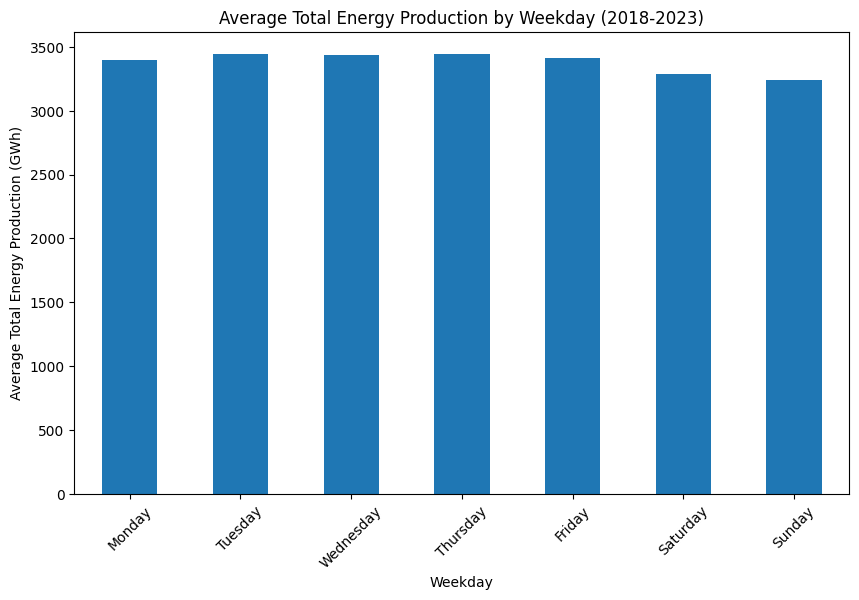

In [19]:
df_avgDay = pd.DataFrame(df_el)

# Konvertiere Datum zu Tag
df_avgDay['Weekday'] = df_avgDay['Tag'].dt.day_name()
energy_columns = df_avgDay.columns.drop(['Tag', 'Weekday'])

# Berechnung mittlerer Energieerzeugung pro Wochentag
mean_energy_by_weekday = df_avgDay.groupby('Weekday')[energy_columns].mean()

# Sortieren der Wochentage
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_energy_by_weekday = mean_energy_by_weekday.reindex(ordered_weekdays)

# Summiere pro Wochentag
mean_energy_by_weekday['Total Energy'] = mean_energy_by_weekday.sum(axis=1)

# Plot
plt.figure(figsize=(10, 6))
mean_energy_by_weekday['Total Energy'].plot(kind='bar')
plt.title('Average Total Energy Production by Weekday (2018-2023)')
plt.xlabel('Weekday')
plt.ylabel('Average Total Energy Production (GWh)')
plt.xticks(rotation=45)
plt.show()

Man erkennt, dass dienstags und donnerstags im Durchschnitt am meisten Energie produziert wird. Am Wochenende wird etwas weniger Energie produziert.

#### c) Zusammensetzung des Strommixes im Zeitverlauf <a name="3c"></a>

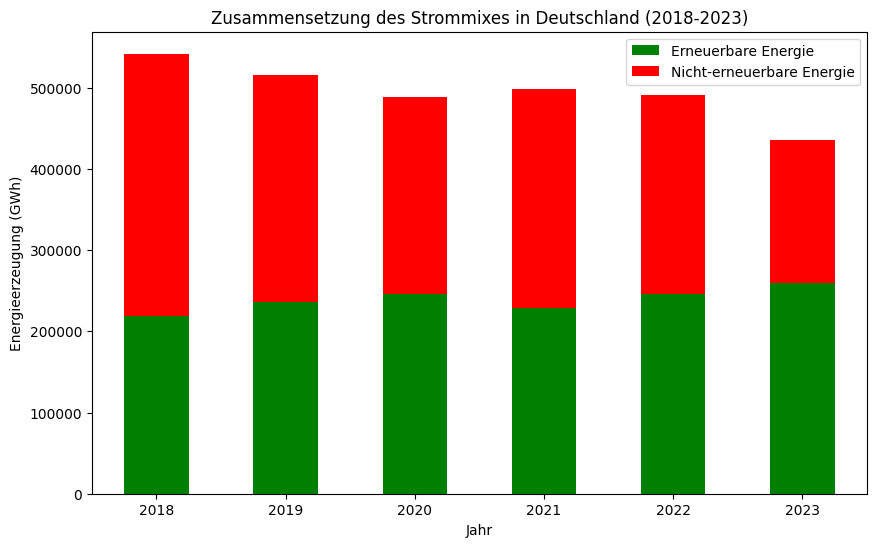

In [20]:
df_list = []
for file in files:
    df_temp = pd.read_csv(file)
    df_temp['Tag'] = pd.to_datetime(df_temp['Tag'], format='%d.%m.%Y')  # Formatting the date
    df_temp['Year'] = df_temp['Tag'].dt.year  # Extracting year from the date
    df_list.append(df_temp)

df_bla2 = pd.concat(df_list, ignore_index=True)
df_bla = df_bla2.drop(columns=['Tag'])
df_bla.head()

# Kategorisierung der Energiequellen in erneuerbare und nicht-erneuerbare
erneuerbare_energien = ['Laufwasser(GWh)', 'Biomasse(GWh)', 'Geothermie(GWh)', 
                        'Speicherwasser(GWh)', 'Erneuerbarer Müll(GWh)', 
                        'Wind Offshore(GWh)', 'Wind Onshore(GWh)', 'Solar(GWh)']
nicht_erneuerbare_energien = ['Kernenergie(GWh)', 'Braunkohle(GWh)', 
                              'Steinkohle(GWh)', 'Öl(GWh)', 'Erdgas(GWh)', 
                              'Nicht-erneuerbarer Müll(GWh)', 'Andere(GWh)']

# Berechnung der Gesamtproduktion von erneuerbaren und nicht-erneuerbaren Energien pro Jahr
df_bla['Erneuerbare Energie (GWh)'] = df_bla[erneuerbare_energien].sum(axis=1)
df_bla['Nicht-erneuerbare Energie (GWh)'] = df_bla[nicht_erneuerbare_energien].sum(axis=1)


# Gruppieren der Daten nach Jahr und Berechnung der Gesamterzeugung für jede Kategorie
yearly_totals = df_bla.groupby('Year').sum()[['Erneuerbare Energie (GWh)', 'Nicht-erneuerbare Energie (GWh)']]

# Erstellung des Plots
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
plt.title('Zusammensetzung des Strommixes in Deutschland (2018-2023)')
plt.xlabel('Jahr')
plt.ylabel('Energieerzeugung (GWh)')
plt.xticks(rotation=0)
plt.legend(['Erneuerbare Energie', 'Nicht-erneuerbare Energie'])
plt.show()

Das Diagramm zeigt die Anteile der erneuerbaren und nicht erneuerbaren Energie an der jährlich erzeugten Gesamtenergie. In diesem Zeitraum kann ein deutlicher Trend zur verstärkten Nutzung erneuerbarer Energiequellen im Verhältnis zu nicht erneuerbaren Energieträgern festgestellt werden.

Während konventionelle Energieträger wie Kohle, Öl und Gas nach wie vor einen bedeutenden Beitrag zur Gesamtenergieerzeugung leisten, zeigen die Daten eine allmähliche Verschiebung hin zu einem höheren Anteil erneuerbarer Energien wie Wind, Sonne und Biomasse. Das hängt auch mit den Klimaschutzzielen von Deutschland zusammen, da erneuerbare Energienquellen zur Umsetzung dieser Ziele von großer Relevanz sind.

#### d) Anteil der Kernenergie im Zeitverlauf <a name=3d></a>

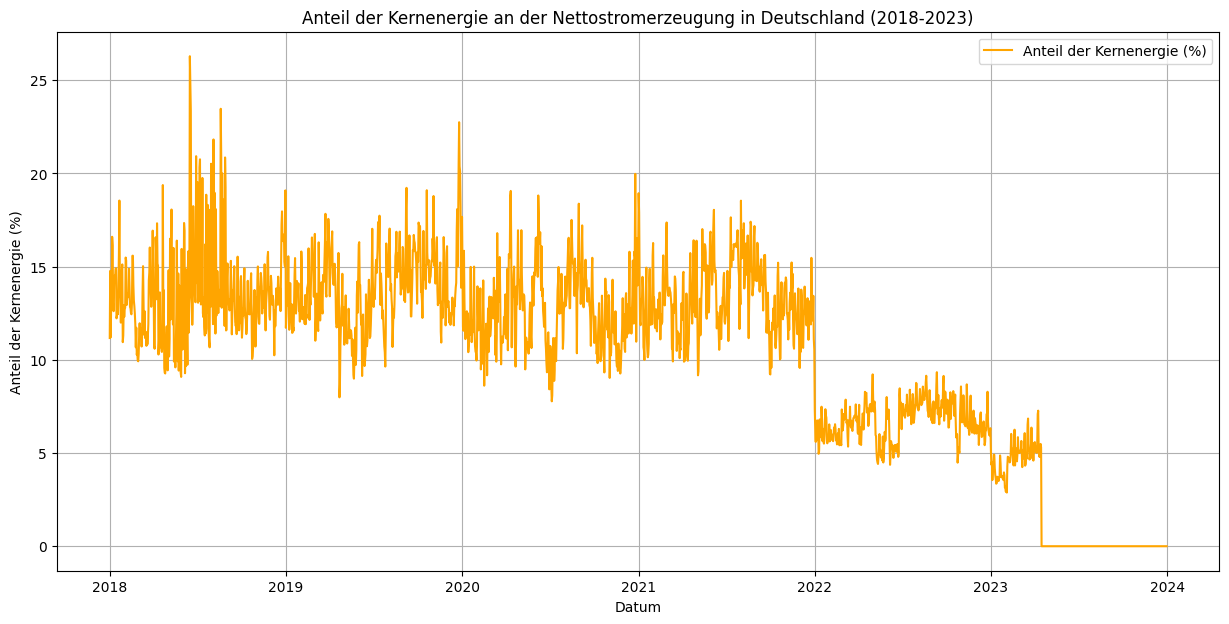

In [21]:
# Insgesamt Erzeugte Energie
df_el['Total_Energy(GWh)'] = df_el.iloc[:, 1:-1].sum(axis=1)

# Berechnung Kernenergieanteil
df_el['Nuclear_Share(%)'] = (df_el['Kernenergie(GWh)'] / df_el['Total_Energy(GWh)']) * 100

# Plot
plt.figure(figsize=(15, 7))
plt.plot(df_el['Tag'], df_el['Nuclear_Share(%)'], label='Anteil der Kernenergie (%)', color="orange")
plt.title('Anteil der Kernenergie an der Nettostromerzeugung in Deutschland (2018-2023)')
plt.xlabel('Datum')
plt.ylabel('Anteil der Kernenergie (%)')
plt.grid(True)
plt.legend()
plt.show()

Das Diagramm zeigt den Verlauf des Ausstiegs aus der Kernenergieerzeugung in Deutschland. Das letzte Atomkraftwerk wurde im April 2023 abgeschaltet, weshalb ab diesem Zeitpunkt auch keine Energieerzeugung mehr im Diagramm zu sehen ist. Insgesamt produziert also Deutschland derzeit keine Kernenergie mehr.

#### e) Zeitlicher Verlauf der Energieerzeugung <a name=3e></a>

In [22]:
df_smoothed = df_el.drop("Total_Energy(GWh)", axis=1)
df_smoothed = df_smoothed.drop("Jahr", axis=1)
df_smoothed = df_smoothed.drop("Nuclear_Share(%)", axis=1)

# Gleitender Mittelwert
rolling_window = 25
df_smoothed = df_smoothed.set_index('Tag').rolling(window=rolling_window).mean().reset_index()

# Interaktives Diagramm mit plotly
fig = px.line(df_smoothed, x='Tag', y=df_smoothed.columns[1:],
              labels={'value': 'Energieerzeugung (GWh)', 'variable': 'Energieträger'},
              title='Zeitliche Verläufe der Energieerzeugung nach Energieträgern in Deutschland (2018-2023)')

# Mit der Legende soll man traces an und ausschalten
fig.update_layout(legend_title_text='Energieträger',
                  legend=dict(traceorder='normal', tracegroupgap=0),
                  hovermode='x')

fig.show()

#### f) Entwicklung der Stromerzeuger seit 2018 <a name=3f></a>

Die Energieerzeugung durch Wind Onshore sticht aus dem Diagramm heraus. Hier erkennt man, dass am meisten im Winter und am wenigsten Windenergie im Sommer produziert wird. Darüberhinaus ist die Energieerzeugung durch Braunkohle und Steinkohle von 2018 bis 2023 weniger geworden.
Energiegewinnung durch Öl, Geothermie, Speicherwasser, Müll und Andere trägt hingegen nur einen verschwindend geringen Teil zur gesamten Energieerzeugung bei.
Durch der Abschaltung der Atomkraftwerke am 15.04.2023 hat sich im Allgemeinen an der Energieerzeugung nur die Gesamte Energie verringert. An den übrigen Stromerzeugern erkennt man keinerlei drastische Anstiege.

## 4 Erzeugter Solarstrom in Abhängigkeit vom Wetter <a name="4"></a>

#### a) Beschaffung historischer Wetterdaten für Amberg <a name=4a></a>

In [23]:
import requests_cache

from retry_requests import retry
import openmeteo_requests

def get_weather_data(lat, lon, start_date, end_date):
    # Open Mateo API Setup + Wiederhole bei Fehler
    cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
    retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
    openmeteo = openmeteo_requests.Client(session=retry_session)

    # API Parameter
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum", 
                  "windspeed_10m_max", "windgusts_10m_max", "winddirection_10m_dominant", 
                  "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean",
                  "sunshine_duration", "daylight_duration", "shortwave_radiation_sum"]
    }

    # Request
    responses = openmeteo.weather_api(url, params=params)

    # Response
    response = responses[0]
    daily = response.Daily()
    daily_data = {
        "date": pd.date_range(
            start=pd.to_datetime(start_date),
            end=pd.to_datetime(end_date),
            freq='D'  # Tägliche Frequenz
        ),
        "temperature_max": daily.Variables(0).ValuesAsNumpy(),
        "temperature_min": daily.Variables(1).ValuesAsNumpy(),
        "precipitation_sum": daily.Variables(2).ValuesAsNumpy(),
        "windspeed_10m_max": daily.Variables(3).ValuesAsNumpy(),
        "windgusts_10m_max": daily.Variables(4).ValuesAsNumpy(),
        "winddirection_10m_dominant": daily.Variables(5).ValuesAsNumpy(),
        "apparent_temperature_max": daily.Variables(6).ValuesAsNumpy(),
        "apparent_temperature_min": daily.Variables(7).ValuesAsNumpy(),
        "apparant_temperature_mean": daily.Variables(8).ValuesAsNumpy(),
        "sunshine_duration": daily.Variables(9).ValuesAsNumpy(),
        "daylight_duration": daily.Variables(10).ValuesAsNumpy(),
        "shortwave_radiation_sum": daily.Variables(11).ValuesAsNumpy(),
        
        
    }
    return pd.DataFrame(data=daily_data)
    
# Holen der Daten
df_weather = get_weather_data(lat=49.44, lon=11.86, start_date='2018-01-01', end_date='2023-12-31')
df_weather

date  temperature_max  temperature_min  precipitation_sum  \
0    2018-01-01         8.922500           1.9725                1.4   
1    2018-01-02         5.072500           1.4225                7.5   
2    2018-01-03         8.972500           1.0225               10.7   
3    2018-01-04        10.072499           3.7225               18.4   
4    2018-01-05         8.372499           4.7725                5.8   
...         ...              ...              ...                ...   
2186 2023-12-27         8.872499           2.2725                0.0   
2187 2023-12-28         9.222500           1.7225                1.1   
2188 2023-12-29        10.172500           5.6725                0.9   
2189 2023-12-30         9.322499           0.3225                0.2   
2190 2023-12-31         5.822500           0.9225                0.5   

      windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
0             22.796841          48.959999                  226.030579   
1             27.645092          60.479996                  255.000290   
2             34.217045          84.599998                  242.035736   
3             28.817993          65.879997                  238.758484   
4             25.982424          61.199997                  246.722443   
...                 ...                ...                         ...   
2186          12.429127          29.160000                  174.335419   
2187          12.313894          24.119999                  206.031570   
2188          25.809765          48.959999                  238.245087   
2189          22.805367          46.439999                  247.011230   
2190          15.315873          32.760002                  176.198959   

      apparent_temperature_max  apparent_temperature_min  \
0                     4.668323                 -2.319474   
1                     0.745056                 -2.827738   
2                     3.171541                 -2.872294   
3                     5.913445                 -1.695934   
4                     5.662585                  0.137214   
...                        ...                       ...   
2186                  5.855928                 -1.290964   
2187                  6.546541                 -2.060504   
2188                  6.168093                  2.614758   
2189                  5.310280                 -3.255291   
2190                  2.331770                 -2.634386   

      apparant_temperature_mean  sunshine_duration  daylight_duration  \
0                      1.137585       17997.857422       29705.875000   
1                     -1.425858        5080.656250       29769.371094   
2                     -0.740206        5796.013184       29838.087891   
3                      1.100277           0.000000       29912.119141   
4                      3.397982        7545.060059       29992.287109   
...                         ...                ...                ...   
2186                   1.902956       12423.601562       29441.906250   
2187                   2.673577        3600.000000       29477.560547   
2188                   4.218830       16801.064453       29519.162109   
2189                   2.133890       11904.796875       29566.568359   
2190                  -0.061515       13227.675781       29619.671875   

      shortwave_radiation_sum  
0                        3.22  
1                        1.93  
2                        1.90  
3                        0.76  
4                        1.91  
...                       ...  
2186                     3.00  
2187                     1.95  
2188                     3.14  
2189                     2.58  
2190                     3.28  

[2191 rows x 13 columns]

#### b) Untersuchung des Wetters auf Korrelation <a name=4b></a>

In [24]:
df_heatmap = df_weather.drop(columns=['date'])

# Berechnung der Korrelationsmatrix
correlation_matrix = df_heatmap.corr()


# Plot
fig = px.imshow(correlation_matrix,
                text_auto=True,
                aspect="auto",
                title="Korrelationsmatrix der Wetterdaten",
                labels=dict(x="Wetterdaten", y="Wetterdaten", color="Korrelation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns)

fig.show()

Es sind ein paar offensichltiche Korrelationen wie temperature_min und temperature_max zu sehen. Ein zweites Beispiel für eine Korrelation wäre zwischen den Variablen shortwave_radiation_sum und temperature_max.

#### c) Sonnenscheinstunden und jährliche Sonneneinstrahlung <a name=4c></a>

In [25]:
# Füge Spalte Jahr hinzu
df_weather['year'] = df_weather['date'].dt.year

# Summiere über die Jahre
sunshine_summary = df_weather.groupby('year').agg(
    total_shortwave_radiation=pd.NamedAgg(column='shortwave_radiation_sum', aggfunc='sum'),
    sunshine_duration=pd.NamedAgg(column='sunshine_duration', aggfunc='sum'),
)

sunshine_summary

total_shortwave_radiation  sunshine_duration
year                                              
2018                4545.049805         10382842.0
2019                4425.430176          9977523.0
2020                4303.390137          9965875.0
2021                4270.290039          9743241.0
2022                4577.169922         10162124.0
2023                4441.450195          9632670.0

Erläurterung zu dieser Ausgabe bei [Teilaufgabe 4f](#4f)

#### d) aggregierte Sonneneinstrahlung pro Monat <a name=4d></a>

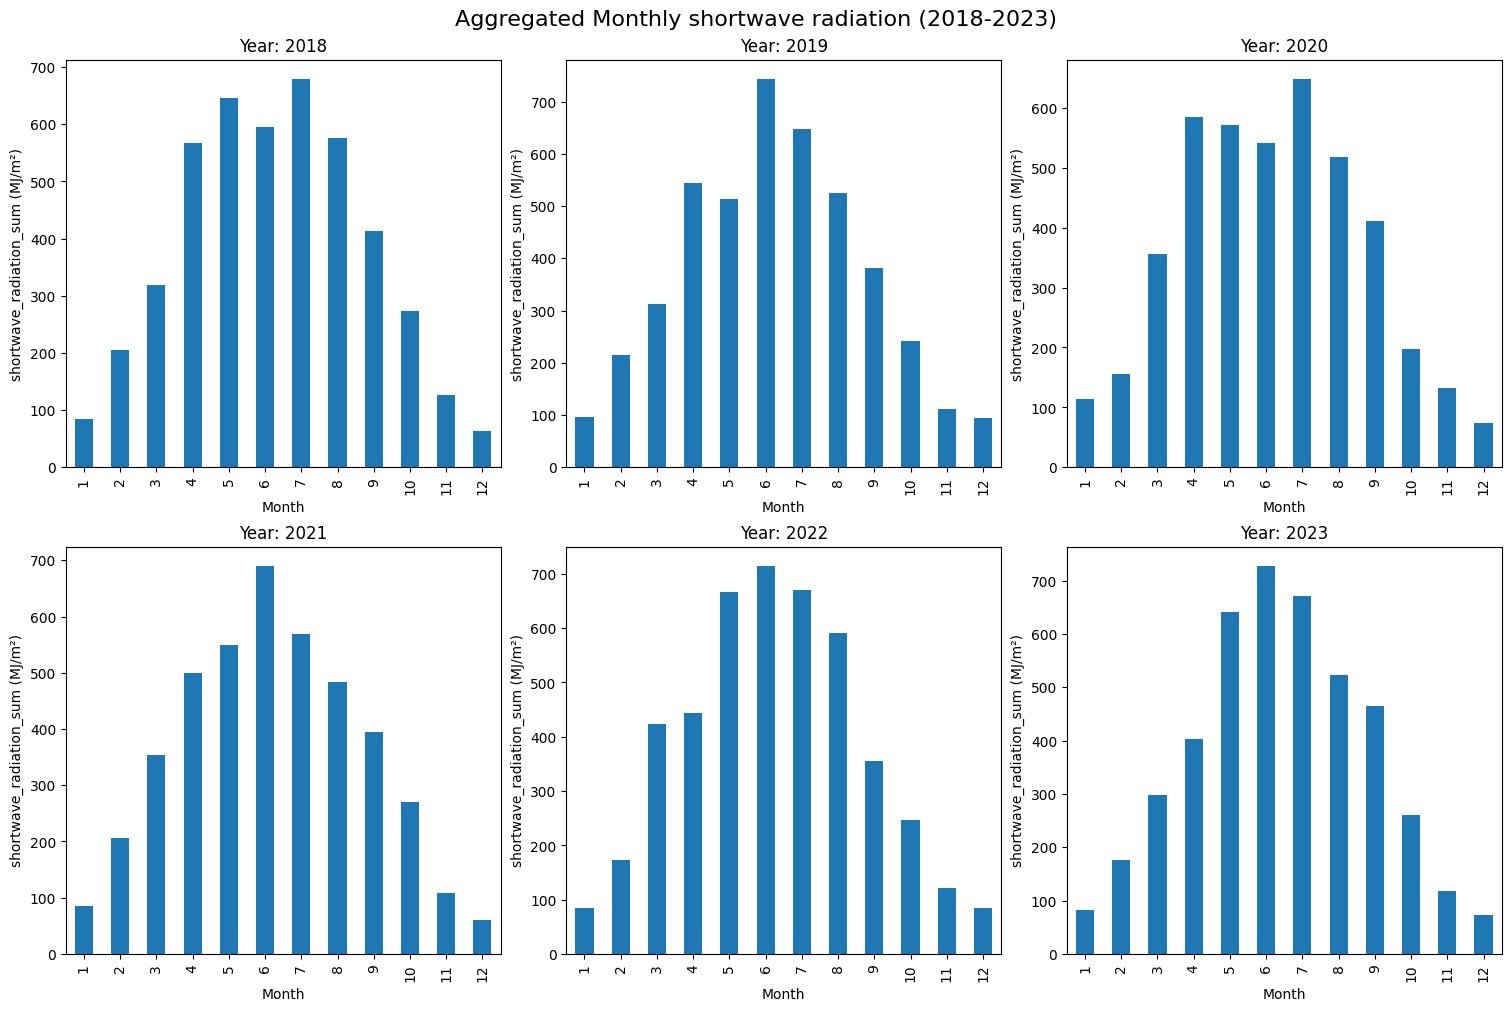

In [26]:
# Sonnenscheindauer pro Jahr und pro Monat
monthly_sunshine = df_weather['shortwave_radiation_sum'].groupby([df_weather['date'].dt.year, df_weather['date'].dt.month]).sum()

# Plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), constrained_layout=True)
fig.suptitle('Aggregated Monthly shortwave radiation (2018-2023)', fontsize=16)

for i, (year, data) in enumerate(monthly_sunshine.groupby(level=0)):
    ax = axes[i // 3, i % 3]
    data.plot(kind='bar', ax=ax)
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('shortwave_radiation_sum (MJ/m²)')
    ax.set_xticklabels(range(1, 13))

plt.show()

#### e) Weitere Diagramme <a name=4e></a>

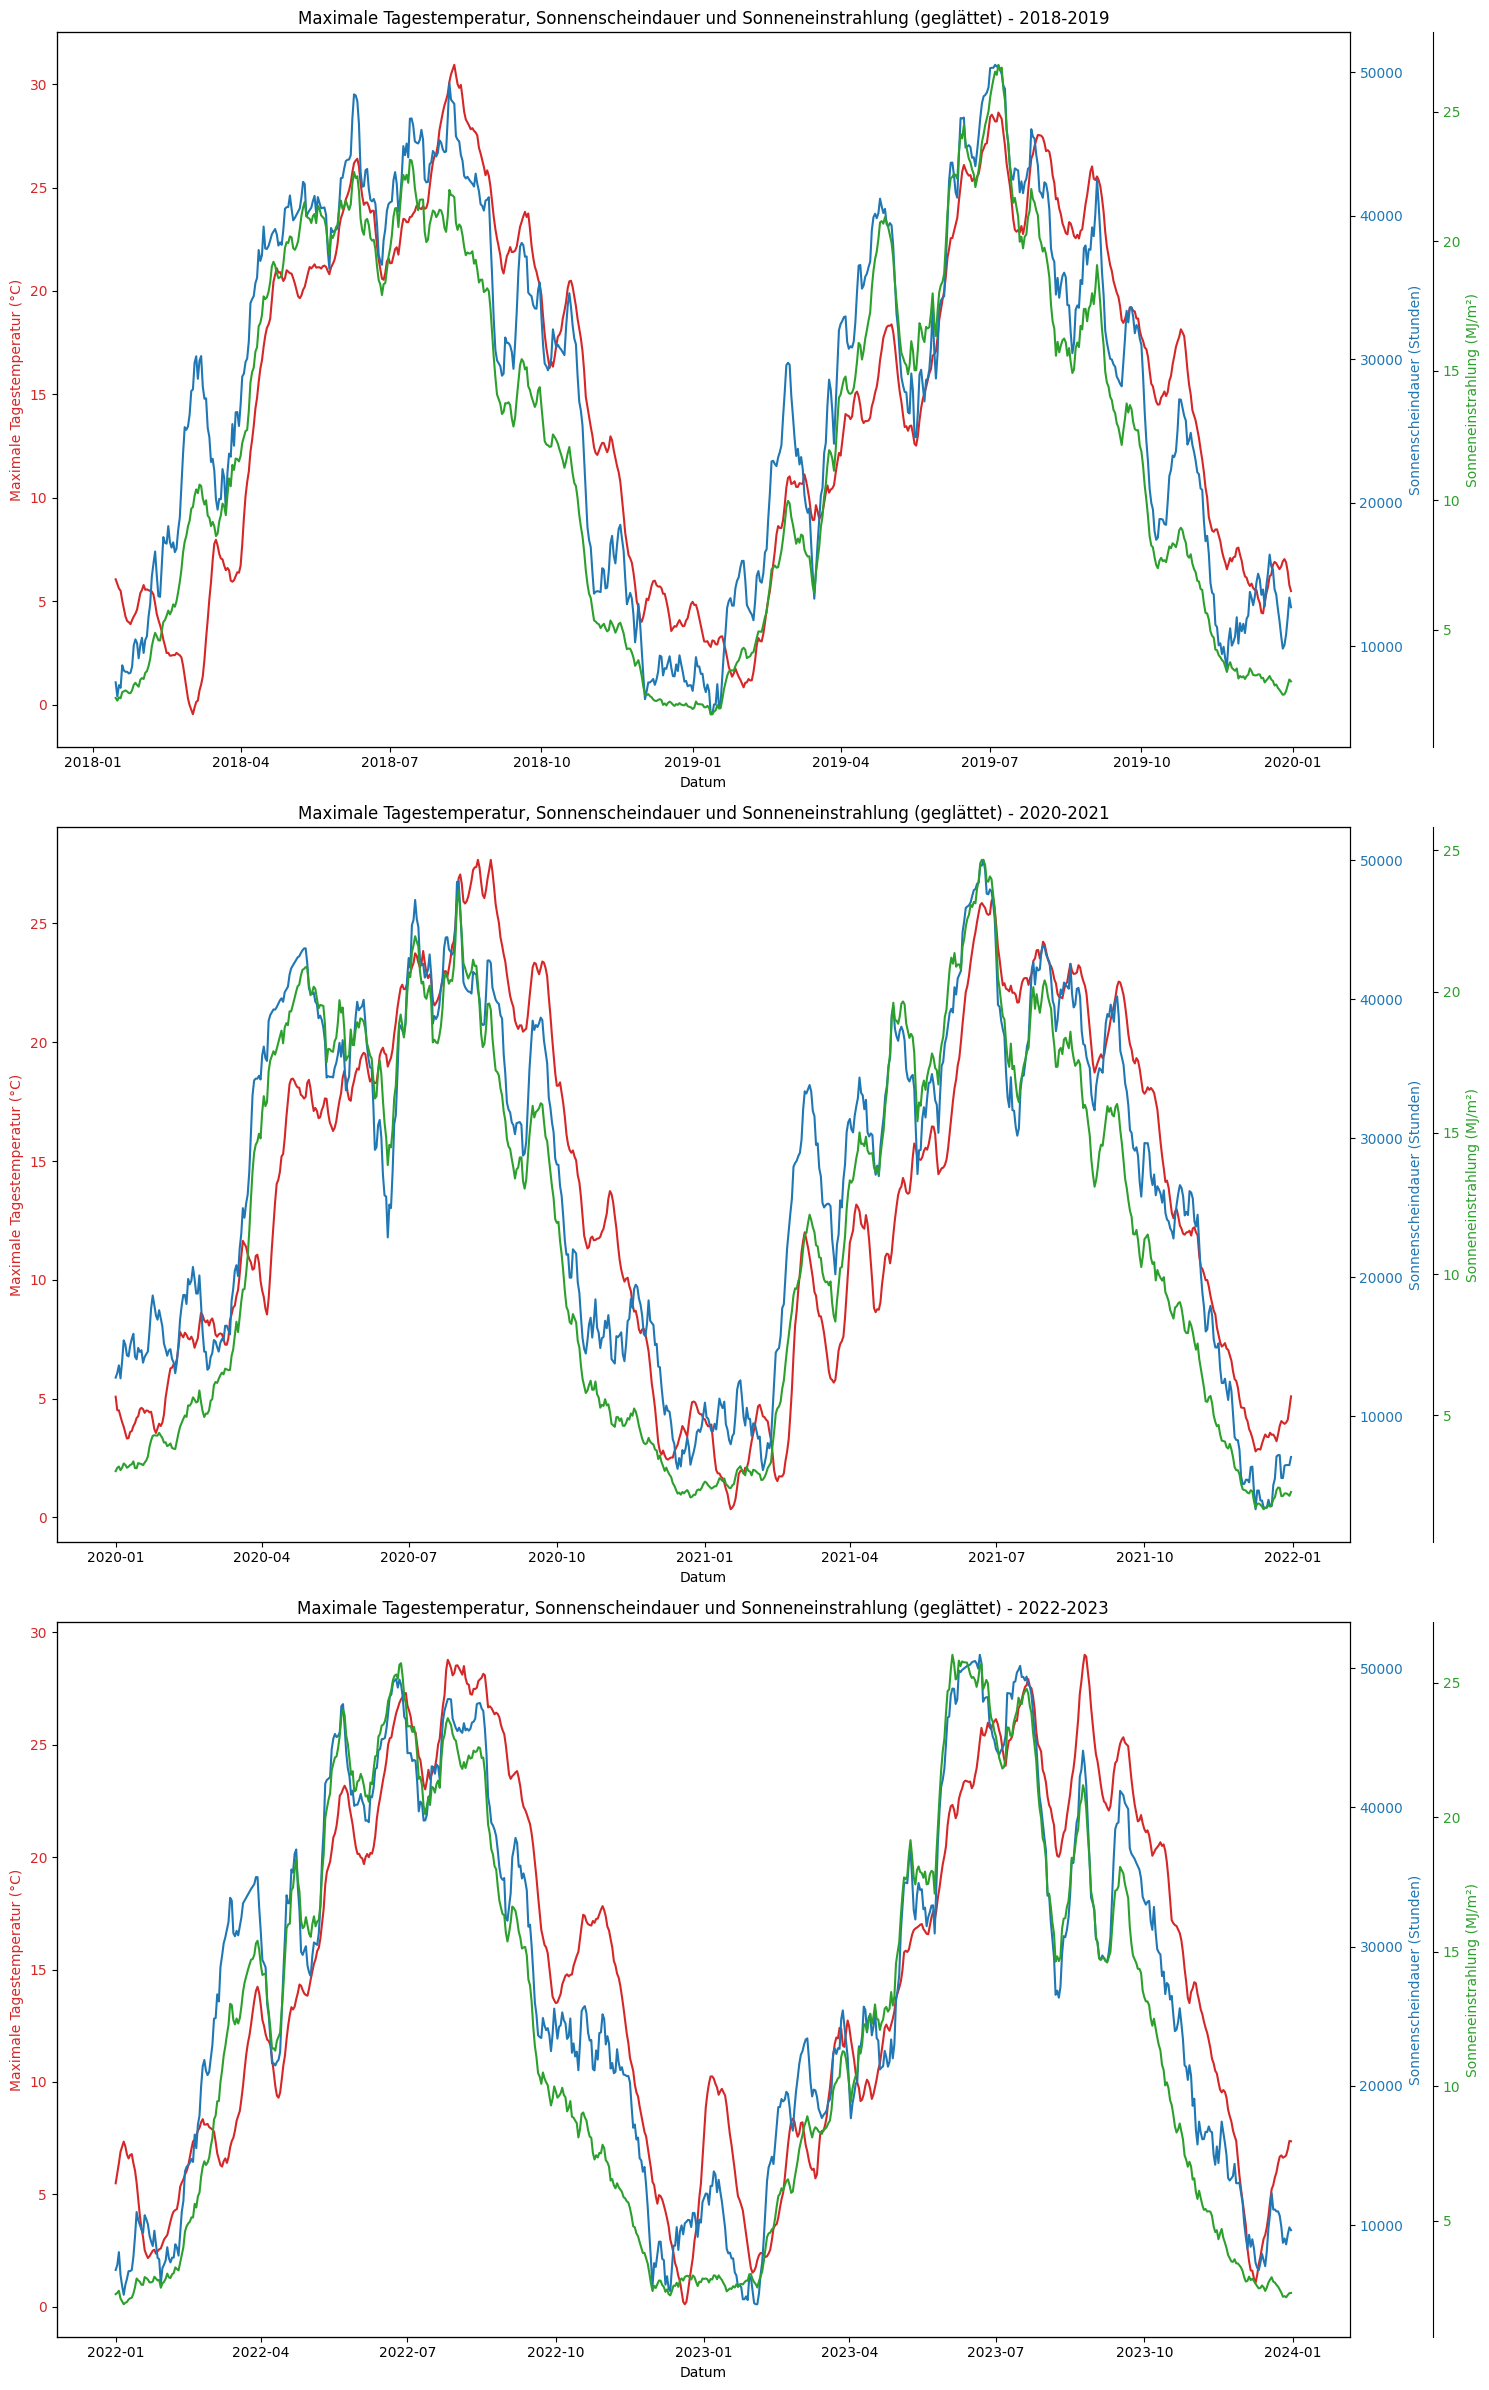

In [27]:

window_size = 15
df_weather['temperature_max_smoothed'] = df_weather['temperature_max'].rolling(window=window_size).mean()
df_weather['sunshine_duration_smoothed'] = df_weather['sunshine_duration'].rolling(window=window_size).mean()
df_weather['solar_radiation_smoothed'] = df_weather['shortwave_radiation_sum'].rolling(window=window_size).mean()

# Erstellen von 3 Plots, jeweils für 2 Jahre
years = df_weather['date'].dt.year.unique()
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

for i in range(3):
    ax1 = axes[i]
    start_year = 2018 + i * 2
    end_year = start_year + 1
    mask = (df_weather['date'].dt.year >= start_year) & (df_weather['date'].dt.year <= end_year)

    color = 'tab:red'
    ax1.set_xlabel('Datum')
    ax1.set_ylabel('Maximale Tagestemperatur (°C)', color=color)
    ax1.plot(df_weather.loc[mask, 'date'], df_weather.loc[mask, 'temperature_max_smoothed'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Zweite y-Achse für Sonnenscheindauer
    color = 'tab:blue'
    ax2.set_ylabel('Sonnenscheindauer (Stunden)', color=color)
    ax2.plot(df_weather.loc[mask, 'date'], df_weather.loc[mask, 'sunshine_duration_smoothed'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax3 = ax1.twinx()  # Dritte y-Achse für Sonneneinstrahlung
    ax3.spines['right'].set_position(('outward', 60))  # Achse nach rechts versetzen
    color = 'tab:green'
    ax3.set_ylabel('Sonneneinstrahlung (MJ/m²)', color=color)
    ax3.plot(df_weather.loc[mask, 'date'], df_weather.loc[mask, 'solar_radiation_smoothed'], color=color)
    ax3.tick_params(axis='y', labelcolor=color)

    # Titel und Layout für jedes Subplot
    ax1.set_title(f'Maximale Tagestemperatur, Sonnenscheindauer und Sonneneinstrahlung (geglättet) - {start_year}-{end_year}')

fig.tight_layout()  # Passt das Layout an, um Überlappungen zu vermeiden
plt.show()

Diese 3 Diagramme wurden so an der y-Skala angepasst, dass trotz unterschiedlicher Größenordnungen ein direkter Zusammenhang zwischen max. Tagestemperatur, Sonnenscheindauer und Sonneneinstrahlung zu sehen ist. Außerdem wurden die Darstellungsbereiche auf 2 Jahre begrenzt um einen tieferen Einblick auf die dargestellten Größen zu gewährleisten.

#### f) Untersuchung der Wettervariablen <a name=4f></a>

**Gesamtkurzwellenstrahlung:** Die Strahlung schwankt von Jahr zu Jahr und erreicht im Jahre 2022 ihr Maximum, sowie im Jahr 2021 ihr Minimum. Die Werte weisen eine relative Konsistenz in der Menge der Strahlung auf, welche die Erde erreicht. Dies liegt daran, dass die Werte zwar schwanken, aber sich nicht großartig über die Jahre verändern.

**Sonnenscheindauer:** Bei der Sonnenscheindauer ist ein Rückgang von 2018 bis 2023 zu erkennen. Das Maximum liegt im Jahr 2018, während das Minimum im Jahr 2023 angenommen wird.

**Temperatur:** Die Temperatur und die Sonnenscheindauer scheinen direkt proportional zu sein, da höhere Temperaturen mit einer höheren Sonneneinstrahlung verbunden sind.

Ingesamt kann man eine starke saisonale Abhängigkeit der drei Wettervariablen erkennen. Die Spitzen werden jeweils im Sommer angenommen, während die Tiefs im Winter zu beobachten sind. Es gibt keine wirklich langfristigen Trends in einer Variable, wenn man von den normalen jährlichen Schwankungen absieht.

#### g) Zusammenhang zwischen Wetterdaten und Solarstromerzeugung <a name=4g></a>

In [28]:
spalten_df_el = df_el[['Solar(GWh)', 'Tag']]

spalten_df_weather = df_weather[['sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'date']]

df_con = pd.merge(spalten_df_el, spalten_df_weather, left_on='Tag', right_on='date', how='inner')
df_con.set_index('date', inplace=True)
df_con = df_con.drop('Tag', axis=1)
df_con

Solar(GWh)  sunshine_duration  daylight_duration  \
date                                                           
2018-01-01       31.10       17997.857422       29705.875000   
2018-01-02       17.20        5080.656250       29769.371094   
2018-01-03       13.80        5796.013184       29838.087891   
2018-01-04        9.80           0.000000       29912.119141   
2018-01-05       19.40        7545.060059       29992.287109   
...                ...                ...                ...   
2023-12-27       51.65       12423.601562       29441.906250   
2023-12-28       32.45        3600.000000       29477.560547   
2023-12-29       30.52       16801.064453       29519.162109   
2023-12-30       47.41       11904.796875       29566.568359   
2023-12-31       26.35       13227.675781       29619.671875   

            shortwave_radiation_sum  
date                                 
2018-01-01                     3.22  
2018-01-02                     1.93  
2018-01-03                     1.90  
2018-01-04                     0.76  
2018-01-05                     1.91  
...                             ...  
2023-12-27                     3.00  
2023-12-28                     1.95  
2023-12-29                     3.14  
2023-12-30                     2.58  
2023-12-31                     3.28  

[2191 rows x 4 columns]

In [29]:
corr_matrix = df_con.corr()

fig = px.imshow(corr_matrix,
                text_auto=True,
                aspect="auto",
                title="Korrelationsmatrix der Wetterdaten",
                labels=dict(x="Wetterdaten", y="Wetterdaten", color="Korrelation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns)

fig.show()

Man erkennt, dass Sonnenscheindauer, Tageslichtdauer und Sonneneinstrahlung alle mit der erzeugten Solarenergie zusammenhängen. 
Je mehr Sonne und Tageslicht, desto mehr Solarstrom wird erzeugt. 
Am wenigsten hängen Sonnenscheindauer und Tageslichtdauer zusammen, was auch Sinn ergibt, da die Tageslichtdauer nicht von dem Bewölktheitsgrad abhängt, jedoch aber die Sonne nur scheint, wenn es Tag ist. 

## 5 Photovoltaik-Ausbau in Deutschland <a name=5></a>

#### a) Einlesen des Marktstammdatenregisters <a name=5a></a>

In [30]:
files = [pd.read_csv(f"Daten/Stromerzeugungseinheiten/EinheitenSolar_{file}.csv", low_memory=False) for file in range(1,39)]
df_pv = pd.concat(files, ignore_index=True)
df_pv

EinheitMastrNummer    DatumLetzteAktualisierung  \
0          SEE984033548619  2020-02-20T16:28:35.2508122   
1          SEE901901460125  2021-07-15T07:54:37.8637095   
2          SEE983679054270  2019-05-28T08:26:38.0316692   
3          SEE978732598938  2020-12-07T08:19:07.9860793   
4          SEE970592691989  2021-01-25T11:18:30.0433603   
...                    ...                          ...   
3733286    SEE962666487727  2023-12-31T22:59:11.7688148   
3733287    SEE927730726591  2023-12-31T23:10:22.2034456   
3733288    SEE968204214268  2023-12-31T23:20:05.7126888   
3733289    SEE939492601771  2024-01-01T00:37:48.5759672   
3733290    SEE951511396703  2024-01-01T00:25:54.8339677   

        AnlagenbetreiberMastrNummer           Bundesland  Postleitzahl  \
0                   ABR949444220202  Nordrhein-Westfalen       48147.0   
1                   ABR930055871044    Baden-Württemberg       73529.0   
2                   ABR983885950021          Brandenburg       14641.0   
3                   ABR980052996196               Bayern       93080.0   
4                   ABR970373690446             Saarland       66740.0   
...                             ...                  ...           ...   
3733286             ABR902834890140          Brandenburg       16827.0   
3733287             ABR996492371288        Niedersachsen       37520.0   
3733288             ABR934043306792  Nordrhein-Westfalen       45896.0   
3733289             ABR959875806043            Thüringen       99310.0   
3733290             ABR989059076832               Hessen       63179.0   

                      Ort Registrierungsdatum EinheitBetriebsstatus  \
0                 Münster          2019-02-01            In Betrieb   
1        Schwäbisch Gmünd          2019-01-31            In Betrieb   
2                   Nauen          2019-01-31            In Betrieb   
3                Pentling          2019-01-31            In Betrieb   
4               Saarlouis          2019-01-31            In Betrieb   
...                   ...                 ...                   ...   
3733286           Krangen          2023-12-31            In Betrieb   
3733287          Osterode          2024-01-01            In Betrieb   
3733288     Gelsenkirchen          2024-01-01            In Betrieb   
3733289          Arnstadt          2024-01-01            In Planung   
3733290      Obertshausen          2024-01-01            In Betrieb   

        Inbetriebnahmedatum                 NameStromerzeugungseinheit  \
0                2007-07-20                  Photovoltaikanlage ERWin4   
1                2013-01-31                                  man-power   
2                2016-02-19                                 eigene PVA   
3                2016-12-16  Photovoltaik EFH Löbert - Mattinger Weg 6   
4                2011-12-08                       PV-Anlage 7,2 (Voll)   
...                     ...                                        ...   
3733286          2023-11-15                                  PVKrangen   
3733287          2023-07-08                       Solaranlage Sperling   
3733288          2024-01-01                                Garagendach   
3733289                 NaN                                 Dachanlage   
3733290          2024-01-01                            Balkonkraftwerk   

         Bruttoleistung  AnzahlModule    Lage  Leistungsbegrenzung  \
0                  3.96          22.0   853.0                802.0   
1                  7.41          38.0   853.0                803.0   
2                  5.04          16.0   853.0                803.0   
3                  6.36          24.0   853.0               1535.0   
4                  7.20          30.0   853.0                802.0   
...                 ...           ...     ...                  ...   
3733286           10.60          25.0   853.0                802.0   
3733287           14.76          36.0   853.0                802.0   
3733288            0.80           2.0 

#### b) Anpassung und Beurteilung der Daten <a name=5b></a>

Betrachtet man die Datentypen, so sind ein paar Anpassungen notwendig. Ein Datum sollte im Datetime-Format vorliegen. Spezifischere Anpassungen folgen in den Teilaufgaben, da eine allgemeine Anpassungen bezüglich fehlender Werte die Ergebnisse folgender Teilaufgaben beeinflussen würde.

In [31]:
df_pv.dtypes

EinheitMastrNummer              object
DatumLetzteAktualisierung       object
AnlagenbetreiberMastrNummer     object
Bundesland                      object
Postleitzahl                   float64
Ort                             object
Registrierungsdatum             object
EinheitBetriebsstatus           object
Inbetriebnahmedatum             object
NameStromerzeugungseinheit      object
Bruttoleistung                 float64
AnzahlModule                   float64
Lage                           float64
Leistungsbegrenzung            float64
Hauptausrichtung               float64
Strasse                         object
Hausnummer                      object
Laengengrad                    float64
Breitengrad                    float64
dtype: object

In [32]:
# Datum als Datetime-Format
df_pv["DatumLetzteAktualisierung"] = pd.to_datetime(df_pv["DatumLetzteAktualisierung"], format="ISO8601")
df_pv["Registrierungsdatum"] = pd.to_datetime(df_pv["Registrierungsdatum"], format="%Y-%m-%d")
df_pv["Inbetriebnahmedatum"] = pd.to_datetime(df_pv["Inbetriebnahmedatum"], format="%Y-%m-%d")
df_pv

EinheitMastrNummer     DatumLetzteAktualisierung  \
0          SEE984033548619 2020-02-20 16:28:35.250812200   
1          SEE901901460125 2021-07-15 07:54:37.863709500   
2          SEE983679054270 2019-05-28 08:26:38.031669200   
3          SEE978732598938 2020-12-07 08:19:07.986079300   
4          SEE970592691989 2021-01-25 11:18:30.043360300   
...                    ...                           ...   
3733286    SEE962666487727 2023-12-31 22:59:11.768814800   
3733287    SEE927730726591 2023-12-31 23:10:22.203445600   
3733288    SEE968204214268 2023-12-31 23:20:05.712688800   
3733289    SEE939492601771 2024-01-01 00:37:48.575967200   
3733290    SEE951511396703 2024-01-01 00:25:54.833967700   

        AnlagenbetreiberMastrNummer           Bundesland  Postleitzahl  \
0                   ABR949444220202  Nordrhein-Westfalen       48147.0   
1                   ABR930055871044    Baden-Württemberg       73529.0   
2                   ABR983885950021          Brandenburg       14641.0   
3                   ABR980052996196               Bayern       93080.0   
4                   ABR970373690446             Saarland       66740.0   
...                             ...                  ...           ...   
3733286             ABR902834890140          Brandenburg       16827.0   
3733287             ABR996492371288        Niedersachsen       37520.0   
3733288             ABR934043306792  Nordrhein-Westfalen       45896.0   
3733289             ABR959875806043            Thüringen       99310.0   
3733290             ABR989059076832               Hessen       63179.0   

                      Ort Registrierungsdatum EinheitBetriebsstatus  \
0                 Münster          2019-02-01            In Betrieb   
1        Schwäbisch Gmünd          2019-01-31            In Betrieb   
2                   Nauen          2019-01-31            In Betrieb   
3                Pentling          2019-01-31            In Betrieb   
4               Saarlouis          2019-01-31            In Betrieb   
...                   ...                 ...                   ...   
3733286           Krangen          2023-12-31            In Betrieb   
3733287          Osterode          2024-01-01            In Betrieb   
3733288     Gelsenkirchen          2024-01-01            In Betrieb   
3733289          Arnstadt          2024-01-01            In Planung   
3733290      Obertshausen          2024-01-01            In Betrieb   

        Inbetriebnahmedatum                 NameStromerzeugungseinheit  \
0                2007-07-20                  Photovoltaikanlage ERWin4   
1                2013-01-31                                  man-power   
2                2016-02-19                                 eigene PVA   
3                2016-12-16  Photovoltaik EFH Löbert - Mattinger Weg 6   
4                2011-12-08                       PV-Anlage 7,2 (Voll)   
...                     ...                                        ...   
3733286          2023-11-15                                  PVKrangen   
3733287          2023-07-08                       Solaranlage Sperling   
3733288          2024-01-01                                Garagendach   
3733289                 NaT                                 Dachanlage   
3733290          2024-01-01                            Balkonkraftwerk   

         Bruttoleistung  AnzahlModule    Lage  Leistungsbegrenzung  \
0                  3.96          22.0   853.0                802.0   
1                  7.41          38.0   853.0                803.0   
2                  5.04          16.0   853.0                803.0   
3                  6.36          24.0   853.0               1535.0   
4                  7.20          30.0   853.0                802.0   
...                 ...           ...     ...                  ...   
3733286           10.60          25.0   853.0                802.0   
3733287           14.76          36.0   853.0                802.0   
3733288            0.80   

In [33]:
df_pv.isnull().sum()

EinheitMastrNummer                   0
DatumLetzteAktualisierung            0
AnlagenbetreiberMastrNummer       6354
Bundesland                          33
Postleitzahl                         2
Ort                                  2
Registrierungsdatum                  0
EinheitBetriebsstatus                0
Inbetriebnahmedatum              59043
NameStromerzeugungseinheit          12
Bruttoleistung                       0
AnzahlModule                     87024
Lage                                56
Leistungsbegrenzung             100832
Hauptausrichtung                 56651
Strasse                        3537205
Hausnummer                     3544485
Laengengrad                    3524840
Breitengrad                    3524840
dtype: int64

Es fehlen sehr viele Werte in den Spalten Straße, Hausnummer, Längengrad und Breitengrad. Für die folgenden Aufgaben wird jedoch keiner dieser Werte wirklich verwendet, weshalb sie weiterhin im Dataframe bleiben, um die Auswertung anderer Informationen genauer zu vollziehen. Analog könnte man die Spalten auch löschen.

**Beurteilung:** Die Datenintegrität und Konsistenz ist nur zu einem gewissen Grad gegeben, da die unterschiedlichen Dataframes auch gleiche Größen in unterschiedlichen Datentypen speichern. Die Datenvalidität ist gegeben. Die Datenaquisition und Erfassung erfolgt teils sehr Lückenhaft. Insgesamt sind die Daten vollständig genug, um sie Auszuwerten.

#### c) Anzahl der Photovoltaikanlagen <a name=5c></a>

In [34]:
# Filtere alle Solaranlagen, welche in Betrieb sind
filter = df_pv["EinheitBetriebsstatus"] == "In Betrieb"
df_in_betrieb = df_pv[filter]
df_in_betrieb.shape[0]

3661547

Insgesamt sind also 3661547 Solaranlagen in allen Bundesländern in Betrieb.

In [35]:
df_in_betrieb["Bundesland"].value_counts()

Bundesland
Bayern                             936440
Nordrhein-Westfalen                650194
Baden-Württemberg                  617978
Niedersachsen                      383833
Hessen                             238412
Rheinland-Pfalz                    211901
Sachsen                            121243
Schleswig-Holstein                 113365
Brandenburg                        102626
Sachsen-Anhalt                      76853
Thüringen                           68878
Mecklenburg-Vorpommern              53566
Saarland                            41835
Berlin                              25866
Hamburg                             12209
Bremen                               6322
Ausschließliche Wirtschaftszone         3
Name: count, dtype: int64

Bayern hat also mit Abstand die meisten Photovoltaik-Anlagen gefolgt von Nordrhein-Westfalen und Baden-Württemberg. 

In [36]:
# Verwerfen aller Solaranlagen, welche nicht in Betrieb sind
df_pv = df_in_betrieb

#### d) Bruttoleistungen in genauerer Betrachtung <a name=5d></a>

In [37]:
df_pv["Bruttoleistung"].mean()

22.33758788976354

In [38]:
df_pv["Bruttoleistung"].median()

8.56

Es handelt sich um eine rechtsschiefe Verteilung der Bruttoleistung. Das bedeutet, dass einige wenige Solaranlagen eine im Gegensatz zur üblichen Solaranlage sehr hohe Bruttoleistung aufweisen und somit den Mittelwert nach oben ziehen, während die Mehrheit der Solaranlagen niedrigere Liestungswerte aufweist.

#### e) Die höchsten Bruttoleistungen <a name=5e></a>

In [39]:
df_pv.sort_values(by="Bruttoleistung", ascending=False).head(10)

EinheitMastrNummer     DatumLetzteAktualisierung  \
1459384    SEE936162158023 2023-05-08 07:29:38.098345500   
1458856    SEE908707111015 2022-04-14 09:01:26.320913100   
3504238    SEE971255740181 2023-12-19 10:45:12.830331000   
2224265    SEE905807996023 2022-02-22 12:04:09.877676000   
2224261    SEE920687311094 2022-02-22 12:03:25.187108300   
854182     SEE968366210313 2023-03-27 14:55:08.537533300   
1921292    SEE998722352005 2021-03-03 13:35:49.470530800   
358238     SEE993157584229 2021-09-22 11:28:27.528279600   
1544111    SEE996455607225 2021-02-24 07:43:02.567673500   
3029411    SEE987833345068 2023-07-21 08:13:36.075088100   

        AnlagenbetreiberMastrNummer              Bundesland  Postleitzahl  \
1459384             ABR930958989624             Brandenburg       15320.0   
1458856             ABR947260383347             Brandenburg       15320.0   
3504238             ABR985377202748                 Sachsen        4575.0   
2224265             ABR947852191381  Mecklenburg-Vorpommern       19089.0   
2224261             ABR947852191381  Mecklenburg-Vorpommern       19089.0   
854182              ABR946626587306  Mecklenburg-Vorpommern       19395.0   
1921292             ABR970043772571             Brandenburg       16356.0   
358238              ABR970043772571             Brandenburg       16356.0   
1544111             ABR970043772571             Brandenburg       16356.0   
3029411             ABR985530053408             Brandenburg       17268.0   

                        Ort Registrierungsdatum EinheitBetriebsstatus  \
1459384       Neuhardenberg          2022-02-15            In Betrieb   
1458856          Neutrebbin          2022-03-09            In Betrieb   
3504238       Neukieritzsch          2023-12-07            In Betrieb   
2224265              Barnin          2021-12-27            In Betrieb   
2224261              Barnin          2021-12-27            In Betrieb   
854182          Plau am See          2021-05-12            In Betrieb   
1921292          Werneuchen          2021-02-11            In Betrieb   
358238           Werneuchen          2021-01-13            In Betrieb   
1544111          Werneuchen          2020-12-13            In Betrieb   
3029411  Boitzenburger Land          2023-07-21            In Betrieb   

        Inbetriebnahmedatum       NameStromerzeugungseinheit  Bruttoleistung  \
1459384          2022-02-10             Solarpark Gottesgabe       153131.42   
1458856          2022-02-23             Solarpark Alttrebbin       150983.04   
3504238          2023-12-06  SILUX Solarpark 2 GmbH ＆ Co. KG       109712.93   
2224265          2021-12-20                     TG_Trafo 105        88680.54   
2224261          2021-12-20                     TG_Trafo 104        82924.14   
854182           2021-04-21                        Gaarz 2.1        70863.87   
1921292          2021-02-02          PV Weesow-Wilmersdorf 3        63060.96   
358238           2020-12-17         PV Weesow-Willmersdorf 1        62147.28   
1544111          2020-11-11         PV Weesow-Willmersdorf 2        61838.40   
3029411          2023-07-19     PV Park Boitzenburger Land 1        60261.96   

         AnzahlModule   Lage  Leistungsbegrenzung  Hauptausrichtung  \
1459384      350064.0  852.0               1535.0             699.0   
1458856      345072.0  852.0               1535.0             699.0   
3504238      191376.0  852.0                802.0             704.0   
2224265      216294.0  852.0                802.0             699.0   
2224261      202254.0  852.0                802.0             699.0   
854182       214739.0  852.0                802.0             699.0   
1921292      157248.0  852.0                802.0             699.0   
358238       153504.0  852.0                802.0             699.0   
1544111      153504.0  852.0                802.0             699.0   
3029411      106770.0  852.0                802.0             699.0   

                        Strasse 

#### f) Monatlicher Zubau der Bruttoleistungen <a name=5f></a>

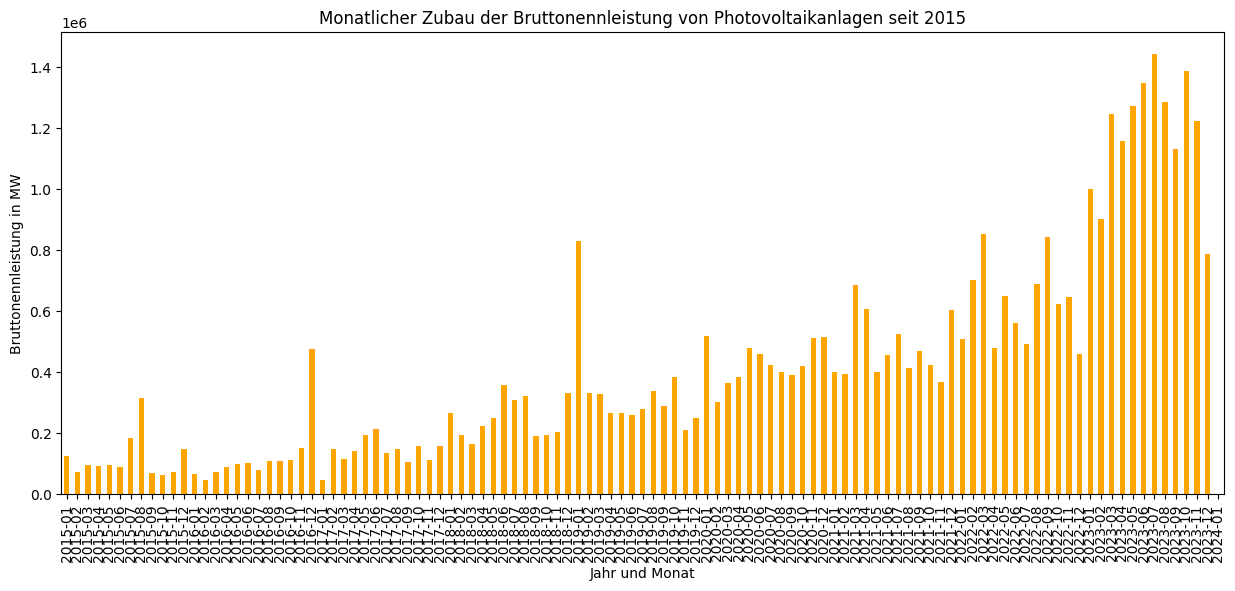

In [40]:
df_pv['JahrMonat'] = df_pv['Inbetriebnahmedatum'].dt.to_period('M')

df_pv_filtered = df_pv[df_pv['Inbetriebnahmedatum'].dt.year >= 2015]


monthly_installation = df_pv_filtered.groupby('JahrMonat')['Bruttoleistung'].sum()


plt.figure(figsize=(15, 6))
monthly_installation.plot(kind='bar', color="orange")
plt.title('Monatlicher Zubau der Bruttonennleistung von Photovoltaikanlagen seit 2015')
plt.xlabel('Jahr und Monat')
plt.ylabel('Bruttonennleistung in MW')
plt.xticks(rotation=90)
plt.show()

Das Diagramm beschreibt den monatlichen Zubau der Bruttonennleistung pro Monat seit dem Jahr 2015. 
In Deutschland und vielen anderen Ländern gibt es Zuschüsse für erneuerbare Energien, sogenannte Einspeisetarife. Diese sollen die wirtschaftliche Rentabilität von Photovoltaik-Anlagen fördern. Wenn also Strom aus nicht erneurbaren Energiequellen teurer wird, als der, der durch eine Photovoltaikanlage erzeugt wird, so wird der Umstieg auf eben diese erneuerbaren Energien unterstützt. Dies und weitere Dinge, wie eine allgemeine Reduktion der Treibhausgasemission, sind die Ziele des Pariser Klimaabkommens Ende des Jahres 2015. An dem Diagramm lässt sich eben dies erkennen. Seit 2015 ist ein konstanter Zuwachs an Photovoltaikanlagen vorhanden. Eine deutliche Steigerung ist besonders ab Beginn des Jahr 2023 zu erkennen. 

#### g) Installierte Bruttoleistungen im Zeitverlauf seit 2000 <a name=5g></a>

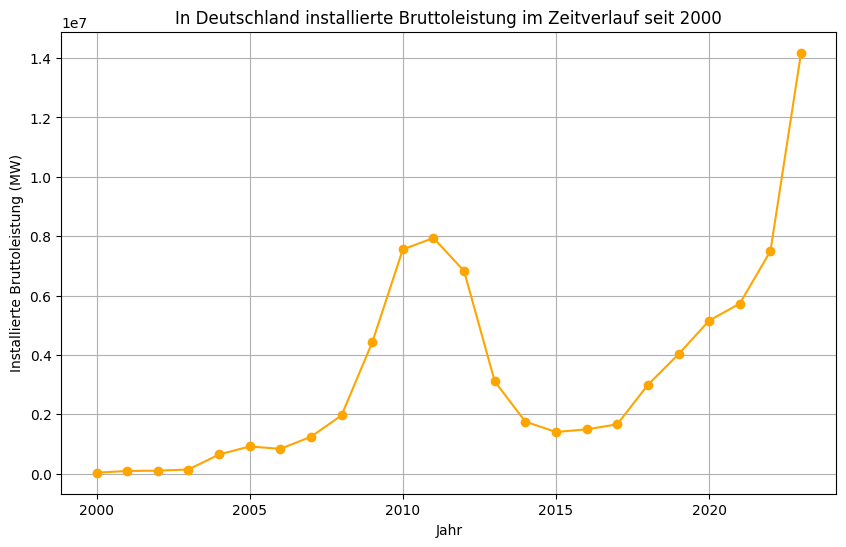

In [41]:
# Filtere die Daten, um nur Einträge seit dem Jahr 2000 zu behalten
df_since_2000 = df_pv[df_pv['Inbetriebnahmedatum'].dt.year >= 2000]
df_since_2000 = df_since_2000[df_since_2000["Inbetriebnahmedatum"].dt.year < 2024]
df_since_2000
# Gruppiere die Daten nach dem Jahr und berechne die summierte Bruttoleistung für jedes Jahr
installations_per_year = df_since_2000.groupby(df_since_2000['Inbetriebnahmedatum'].dt.year)['Bruttoleistung'].sum()
installations_per_year = installations_per_year
# Plot
plt.figure(figsize=(10, 6))
installations_per_year.plot(marker='o', color="orange")
plt.title('In Deutschland installierte Bruttoleistung im Zeitverlauf seit 2000')
plt.xlabel('Jahr')
plt.ylabel('Installierte Bruttoleistung (MW)')
plt.grid(True)
plt.show()

Das Diagramm beschreibt die Höhe der in jedem Jahr installierten Bruttoleistung. Hier sieht man um das Jahr 2010 herum, dass eine deutlich höhere Bruttoleistung und somit auch eine höhere Anzahl an Solaranlagen installiert worden ist. In den Folgejahren hat die Installationsrate wieder abgenommen. Ab dem Jahr 2017 steigt diese wieder deutlich und erreicht im Jahre 2023 ihren Höhepunkt. 

#### h) Installierte Bruttoleistungen pro Bundesland <a name=5h></a>

In [42]:
import pandas as pd
import folium

# Gruppiere die Daten nach Bundesland und berechne die summierte Bruttoleistung für jedes Bundesland
installations_per_state = df_pv.groupby('Bundesland')['Bruttoleistung'].sum().reset_index()

# Lade das GeoJSON-File der Bundesländer
geojson_data = r'Daten/bundeslaender_geo.json'

# Erstelle die Karte
m = folium.Map(location=[51.1657, 10.4515], zoom_start=6)  # Mittelpunkt von Deutschland

# Füge die Choroplethen-Layer hinzu
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=installations_per_state,
    columns=['Bundesland', 'Bruttoleistung'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Installierte Bruttoleistung (MW)',
).add_to(m)

# Füge die Layer-Control hinzu
folium.LayerControl().add_to(m)

m

Wie in Aufgabe 5c bereits zu erkennen hat hat Bayern mit hohem Abstand die meisten Photovoltaik-Anlagen, gefolgt von Nordrhein-Westfalen und Baden-Württemberg. Am wenigsten Solaranlagen besitzen Bremen, Hamburg und Berlin. Bei diesen handelt es sich allerdings auch um die kleinsten Bundesländer.

#### i) Typische Namen für PV-Anlagen <a name=5i></a>

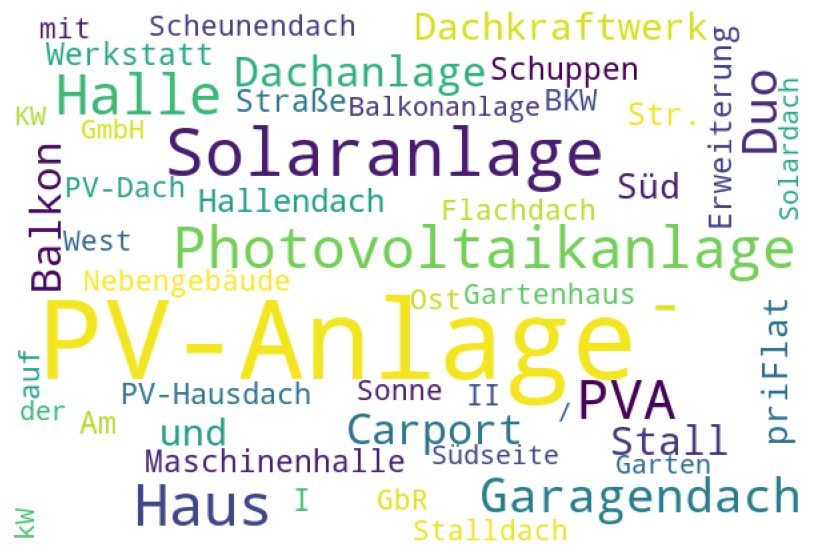

In [43]:
import re
from wordcloud import WordCloud
from collections import Counter


pv_names = df_pv['NameStromerzeugungseinheit'].dropna()

text = " ".join(name for name in pv_names)

common_words_to_exclude = ['PV', 'Anlage', 'Hausdach', 'Solar', 'Dach', 'kWp', 'Scheune', 'Garage', 'Balkonkraftwerk', 'Photovoltaik', 'Wohnhaus']

words = text.split()

filtered_words = [word for word in words if word not in common_words_to_exclude]
filtered_words_no_numbers = [word for word in filtered_words if not re.search(r'\d', word)]

word_counts_no_numbers = Counter(filtered_words_no_numbers)

wordcloud_no_numbers = WordCloud(width=600, height=400,
                                 background_color='white',
                                 min_font_size=15).generate_from_frequencies(word_counts_no_numbers)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_no_numbers)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### j) Zusammenhang zwischen installierter Leistung und erzeugtem Solarstrom <a name=5j></a>

In [44]:
df_inst_brut = df_pv[["Inbetriebnahmedatum","Bruttoleistung"]]
df_inst_brut = df_inst_brut.groupby("Inbetriebnahmedatum")["Bruttoleistung"].sum()
df_solar = df_el[["Tag", "Solar(GWh)"]]
merged = pd.merge(df_inst_brut, df_solar, left_index=True, right_on="Tag", how="inner")
merged

Bruttoleistung        Tag  Solar(GWh)
0           6740.335 2018-01-01       31.10
1          29036.321 2018-01-02       17.20
2           7892.901 2018-01-03       13.80
3           8354.947 2018-01-04        9.80
4          10040.686 2018-01-05       19.40
...              ...        ...         ...
2186       16172.175 2023-12-27       51.65
2187        6311.224 2023-12-28       32.45
2188        5684.739 2023-12-29       30.52
2189        2723.250 2023-12-30       47.41
2190         952.595 2023-12-31       26.35

[2191 rows x 3 columns]

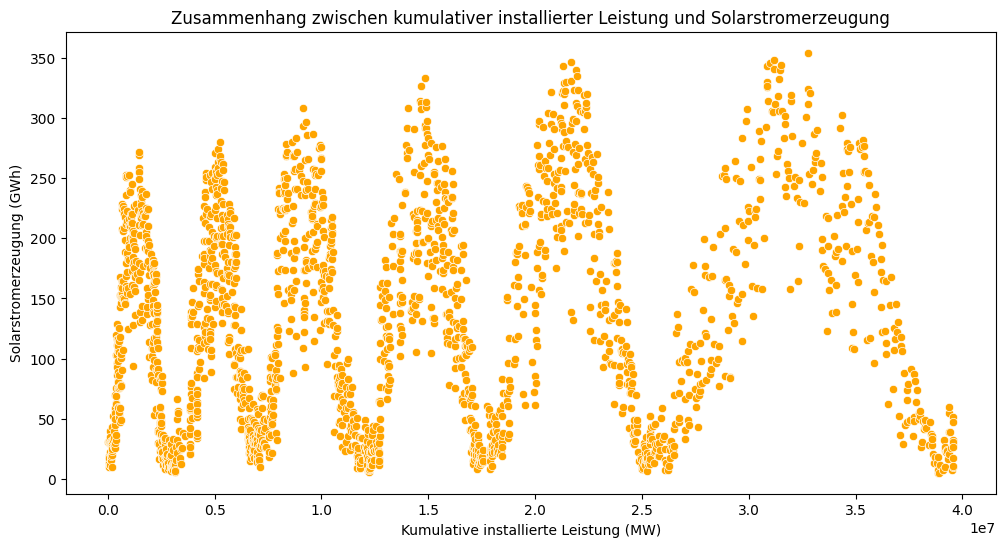

In [45]:
merged['Bruttoleistung'].fillna(0, inplace=True)

# Erneute kumulative Berechnung der installierten Leistung
merged['Kumulative_Leistung'] = merged['Bruttoleistung'].cumsum()

# Erneute Korrelationsberechnung und Visualisierung
correlation = merged['Kumulative_Leistung'].corr(merged['Solar(GWh)'])

# Erstellen des Scatterplots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Kumulative_Leistung', y='Solar(GWh)', data=merged, color="orange")
plt.title('Zusammenhang zwischen kumulativer installierter Leistung und Solarstromerzeugung')
plt.xlabel('Kumulative installierte Leistung (MW)')
plt.ylabel('Solarstromerzeugung (GWh)')
plt.show()

In [46]:
# Export
merged.to_csv("erzeugung_leistung.csv", index=False)

Das Diagramm beschreibt den Zusammenhang zwischen kumulativ installierter Bruttoleistung und der Solarstromerzeugung. Die x-Achse ist so gewählt, dass dennoch der zeitliche Verlauf, hier nun aber nichtmehr linear, inbegriffen ist. Wir sehen anhand der Ausdehnung der Tiefs und Hochs, was einem Jahr entspricht, dass mit fortschreitender Zeit immer mehr Solaranlagen pro Jahr installiert werden. Es ist zu erkennen, dass, abgesehen von den saisonalen Schwankungen, mit steigender installierter Gesamtbruttoleistung mehr Solarstrom erzeugt wird.

## 6 Modellbildung <a name=6></a>

#### a) Modelltraining <a name=6a></a>

In [47]:
df_pv_grouped = df_pv.groupby('Inbetriebnahmedatum')['Bruttoleistung'].sum().cumsum().reset_index() 
df_pv_grouped.rename(columns={'Bruttoleistung': 'Kumulierte_Leistung'}, inplace=True)


df_el['Tag'] = pd.to_datetime(df_el['Tag'])
df_merged = pd.merge(df_el, df_weather, left_on='Tag', right_on='date', how='left')


df_merged = pd.merge_asof(df_merged.sort_values('Tag'), df_pv_grouped.sort_values('Inbetriebnahmedatum'), 
                          left_on='Tag', right_on='Inbetriebnahmedatum', direction='backward')

# Selecting only the required columns for the task
required_columns = ['Tag', 'Solar(GWh)', 'sunshine_duration', 'daylight_duration', 
                    'shortwave_radiation_sum', 'Kumulierte_Leistung']
df_final = df_merged[required_columns]

df_final

Tag  Solar(GWh)  sunshine_duration  daylight_duration  \
0    2018-01-01       31.10       17997.857422       29705.875000   
1    2018-01-02       17.20        5080.656250       29769.371094   
2    2018-01-03       13.80        5796.013184       29838.087891   
3    2018-01-04        9.80           0.000000       29912.119141   
4    2018-01-05       19.40        7545.060059       29992.287109   
...         ...         ...                ...                ...   
2186 2023-12-27       51.65       12423.601562       29441.906250   
2187 2023-12-28       32.45        3600.000000       29477.560547   
2188 2023-12-29       30.52       16801.064453       29519.162109   
2189 2023-12-30       47.41       11904.796875       29566.568359   
2190 2023-12-31       26.35       13227.675781       29619.671875   

      shortwave_radiation_sum  Kumulierte_Leistung  
0                        3.22         4.221578e+07  
1                        1.93         4.224482e+07  
2                        1.90         4.225271e+07  
3                        0.76         4.226107e+07  
4                        1.91         4.227111e+07  
...                       ...                  ...  
2186                     3.00         8.177442e+07  
2187                     1.95         8.178073e+07  
2188                     3.14         8.178642e+07  
2189                     2.58         8.178914e+07  
2190                     3.28         8.179010e+07  

[2191 rows x 6 columns]

In [48]:
df_final.to_csv("dataset_model.csv", index=False)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Definieren der Zielvariable und der Merkmale
y = df_final['Solar(GWh)']
X = df_final.drop(['Tag', 'Solar(GWh)'], axis=1)

# Aufteilen der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Erstellen des linearen Regressionsmodells
model = LinearRegression()

# Training des Modells mit dem Trainingsdatensatz
model.fit(X_train, y_train)

# Vorhersagen auf dem Trainings- und Testdatensatz
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)




mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

mape_train, mape_test

(0.2757045834610463, 0.2718917946340792)

Durch Anpassung des Train/Test-Splits werden unterschiedliche Ergebnisse auf den Training- bzw. Test-Daten erzielt. Vergrößert man den Bereich der Trainingsdaten, so ist eine leichte Verbesserung auf dem Testdatensatz zu sehen. Der Mean Absolut Percentage Error kann an dieser Stelle mit unseren Möglichkeiten nicht weiter erheblich verkleinert werden. Mögliche Limitierungen werden in [Aufgabe 6c](#6c) besprochen.

#### b) Vorhersagen <a name=6b></a>

In [50]:
from datetime import datetime, timedelta

letzte_leistung = df_final['Kumulierte_Leistung'].iloc[-1]
vorletzte_leistung = df_final['Kumulierte_Leistung'].iloc[-2]
zunahme = letzte_leistung - vorletzte_leistung

# Simulation der am 29.01. erreichten kumulativen Leistung
letzte_leistung = letzte_leistung + 29 * zunahme

# Letztes Datum im DataFrame
letztes_datum = pd.to_datetime(df_final['Tag'].iloc[-1])

# Erstellen eines Datumsbereichs vom letzten Datum bis zum 4. Februar 2024
vorhersage_datumsbereich = pd.date_range(start=letztes_datum + timedelta(days=29), end='2024-02-04')

# Berechnung der kumulativen Leistung für jeden Tag im Vorhersagezeitraum
kumulative_leistung_vorhersage = [letzte_leistung + (i + 1) * zunahme for i in range(len(vorhersage_datumsbereich))]

# Erstellen eines DataFrames für den Vorhersagezeitraum
df_vorhersage = pd.DataFrame({
    'Tag': vorhersage_datumsbereich,
    'Kumulierte_Leistung': kumulative_leistung_vorhersage
})

# Anzeige der ersten Zeilen des Vorhersage-DataFrames
df_vorhersage.head(30)

Tag  Kumulierte_Leistung
0 2024-01-29         8.181867e+07
1 2024-01-30         8.181963e+07
2 2024-01-31         8.182058e+07
3 2024-02-01         8.182153e+07
4 2024-02-02         8.182248e+07
5 2024-02-03         8.182344e+07
6 2024-02-04         8.182439e+07

In [51]:
# Extrahierung von Jahr und Tag des Jahres für die Berechnungen
df_final['Jahr'] = df_final['Tag'].dt.year
df_final['Tag_des_Jahres'] = df_final['Tag'].dt.dayofyear

# Berechnung des Medians der Vorjahreswerte für 'sunshine_duration' und 'shortwave_radiation_sum'
median_sunshine_duration = df_final.groupby('Tag_des_Jahres')['sunshine_duration'].median()
median_shortwave_radiation_sum = df_final.groupby('Tag_des_Jahres')['shortwave_radiation_sum'].median()

In [52]:
# Extraktion der Tageslichtdauer des Vorjahres
vorjahr = df_final['Jahr'].max()
df_vorjahr = df_final[df_final['Jahr'] == vorjahr]

# Mapping der Tageslichtdauer aus dem Vorjahr und der Mediane auf den Vorhersage-DataFrame
df_vorhersage['daylight_duration'] = df_vorhersage['Tag'].dt.dayofyear.map(df_vorjahr.set_index('Tag_des_Jahres')['daylight_duration'])
df_vorhersage['sunshine_duration'] = df_vorhersage['Tag'].dt.dayofyear.map(median_sunshine_duration)
df_vorhersage['shortwave_radiation_sum'] = df_vorhersage['Tag'].dt.dayofyear.map(median_shortwave_radiation_sum)

# Überprüfung der ersten Zeilen des aktualisierten Vorhersage-DataFrames
df_vorhersage=df_vorhersage.drop('Tag', axis=1)
df_vorhersage.head(10)

Kumulierte_Leistung  daylight_duration  sunshine_duration  \
0         8.181867e+07       33235.261719        6516.700195   
1         8.181963e+07       33415.605469       13501.219238   
2         8.182058e+07       33598.000000        8129.546387   
3         8.182153e+07       33782.222656        2727.968323   
4         8.182248e+07       33968.058594        3528.106628   
5         8.182344e+07       34155.289062        3600.000000   
6         8.182439e+07       34343.710938       23057.445312   

   shortwave_radiation_sum  
0                    2.845  
1                    4.180  
2                    2.625  
3                    2.960  
4                    2.775  
5                    2.345  
6                    5.415

In [53]:
df_vorhersage_reorganisiert = df_vorhersage[[ 'sunshine_duration', 'daylight_duration', 'shortwave_radiation_sum', 'Kumulierte_Leistung']]

# Überprüfung des umsortierten DataFrames
df_vorhersage_reorganisiert.head(10)

sunshine_duration  daylight_duration  shortwave_radiation_sum  \
0        6516.700195       33235.261719                    2.845   
1       13501.219238       33415.605469                    4.180   
2        8129.546387       33598.000000                    2.625   
3        2727.968323       33782.222656                    2.960   
4        3528.106628       33968.058594                    2.775   
5        3600.000000       34155.289062                    2.345   
6       23057.445312       34343.710938                    5.415   

   Kumulierte_Leistung  
0         8.181867e+07  
1         8.181963e+07  
2         8.182058e+07  
3         8.182153e+07  
4         8.182248e+07  
5         8.182344e+07  
6         8.182439e+07

In [54]:
pred=model.predict(df_vorhersage_reorganisiert)

pred

array([63.62371466, 75.42993539, 62.76143752, 65.21171382, 64.18878537,
       61.12859431, 88.20338042])

**Antwort:** Die Prognose von 29.01. - 04.02.2024:
- 29.01. : 63.98 GWh
- 30.01. : 76.21 GWh
- 31.01. : 63.55 GWh
- 01.02. : 64.96 GWh
- 02.02. : 64.19 GWh
- 03.02. : 61.41 GWh
- 04.02. : 89.98 GWh

#### c) Mögliche Verbesserungen am Modell <a name=6c></a>

Zuallererst sollte man bedenken, dass die Daten ab 2018 verwendet werden. Um eine genauere Prognose zu bekommen, sollte man auch noch frühere Jahre zusätzlich brücksichtigen. 
Außerdem basieren Lineare Regressionsmodell darauf, dass die Variablen annähernd linear sind. Das trifft auf unsere daten möglicherweise nicht zu, da viele Faktoren wie das Wetter oder andere saisonale Einflüsse etwas komplexere, also auch nicht lineare Beziehungen aufweisen können. Eine weitere Limitierung ist auch, dass das Modell nur auf die Solarstromerzeugung in Deutschland und nicht auch in anderen Regionen verwendet werden kann. 

**Verbesserungen:**
- Erweiterung des Datensatzes
- Mehr Features (Feature-Engineering)
- Nicht lineare Regression verwenden (bspw. Neuronales Netz)

[nach oben](#inhaltsverzeichnis)